# Machine Learning Models to Assess Depression, Anxiety, and Stress (DASS-21)

## Dataset Loading and Exploratory Data Analysis


In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load the Dataset


In [46]:
# Load the dataset
df = pd.read_excel('DASS-21 dataset.xlsx')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nOriginal column names:")
print(df.columns.tolist())


Dataset loaded successfully!

Dataset shape: (1258, 23)
Number of rows: 1258
Number of columns: 23

Original column names:
['Your Gender', 'Your Age', 'I found it hard to wind down ', ' I was aware of dryness of my mouth', " I couldn't seem to experience any positive feeling at all ", 'I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion)', 'I found it difficult to work up the initiative to do things ', 'I tended to over-react to situations', 'I experienced trembling (eg, in the hands) ', 'I felt that I was using a lot of nervous energy  ', 'I was worried about situations in which I might panic and make a fool of myself ', 'I felt that I had nothing to look forward ', 'I found myself getting agitated ', 'I found it difficult to relax', '  I felt down-hearted and blue ', 'I was intolerant of anything that kept me from getting on with what I was doing', 'I felt I was close to panic ', 'I was unable to become enthusiastic 

## 1.1. Rename Columns


In [47]:
# Rename columns to convenient names, correcting for leading/trailing spaces in source column names
column_mapping = {
    'Your Gender': 'Gender',
    'Your Age': 'Age',
    'I found it hard to wind down ': 'Hard_to_wind_down',
    ' I was aware of dryness of my mouth': 'Dry_mouth',
    " I couldn't seem to experience any positive feeling at all ": 'No_positive_feeling',
    'I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion)': 'Breathing_difficulty',
    'I found it difficult to work up the initiative to do things ': 'Lack_initiative',
    'I tended to over-react to situations': 'Over_react',
    'I experienced trembling (eg, in the hands) ': 'Trembling',
    'I felt that I was using a lot of nervous energy  ': 'Nervous_energy',
    'I was worried about situations in which I might panic and make a fool of myself ': 'Worried_panic',
    'I felt that I had nothing to look forward ': 'Nothing_look_forward',
    'I found myself getting agitated ': 'Getting_agitated',
    'I found it difficult to relax': 'Difficult_relax',
    '  I felt down-hearted and blue ': 'Downhearted',
    'I was intolerant of anything that kept me from getting on with what I was doing': 'Intolerant',
    'I felt I was close to panic ': 'Close_panic',
    'I was unable to become enthusiastic about anything': 'Unable_enthusiastic',
    "I felt I wasn't worth much as a person ": 'Not_worth_much',
    'I felt that I was rather touchy ': 'Touchy',
    'I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, heart missing a beat) ': 'Heart_awareness',
    'I felt scared without any good reason ': 'Scared_no_reason',
    'I felt that life was meaningless ': 'Life_meaningless'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

print("Columns renamed successfully!")
print("\nNew column names:")
print(df.columns.tolist())
print(f"\nTotal columns: {len(df.columns)}")


Columns renamed successfully!

New column names:
['Gender', 'Age', 'Hard_to_wind_down', 'Dry_mouth', 'No_positive_feeling', 'Breathing_difficulty', 'Lack_initiative', 'Over_react', 'Trembling', 'Nervous_energy', 'Worried_panic', 'Nothing_look_forward', 'Getting_agitated', 'Difficult_relax', 'Downhearted', 'Intolerant', 'Close_panic', 'Unable_enthusiastic', 'Not_worth_much', 'Touchy', 'Heart_awareness', 'Scared_no_reason', 'Life_meaningless']

Total columns: 23


## 2. Initial Data Exploration


In [48]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*80)
print("Last 5 rows of the dataset:")
print(df.tail())


First 5 rows of the dataset:
   Gender  Age  Hard_to_wind_down  Dry_mouth  No_positive_feeling  \
0    Male   24                  2          2                    2   
1  Female   24                  0          2                    0   
2    Male   25                  3          3                    3   
3    Male   25                  2          3                    3   
4    Male   23                  1          3                    0   

   Breathing_difficulty  Lack_initiative  Over_react  Trembling  \
0                     0                3           2          0   
1                     1                2           0          0   
2                     2                3           2          3   
3                     3                3           3          3   
4                     1                1           1          1   

   Nervous_energy  ...  Difficult_relax  Downhearted  Intolerant  Close_panic  \
0               3  ...                1            3           2        

In [49]:
# Dataset information
print("Dataset Information:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Column Names:")
print(df.columns.tolist())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                1258 non-null   object
 1   Age                   1258 non-null   int64 
 2   Hard_to_wind_down     1258 non-null   int64 
 3   Dry_mouth             1258 non-null   int64 
 4   No_positive_feeling   1258 non-null   int64 
 5   Breathing_difficulty  1258 non-null   int64 
 6   Lack_initiative       1258 non-null   int64 
 7   Over_react            1258 non-null   int64 
 8   Trembling             1258 non-null   int64 
 9   Nervous_energy        1258 non-null   int64 
 10  Worried_panic         1258 non-null   int64 
 11  Nothing_look_forward  1258 non-null   int64 
 12  Getting_agitated      1258 non-null   int64 
 13  Difficult_relax       1258 non-null   int64 
 14  Downhearted           1258 non-null   int64 
 15  Intolerant       

In [50]:
# Check for missing values
print("Missing Values Analysis:")
print("="*80)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing Values Analysis:
No missing values found in the dataset!

Total missing values: 0


In [51]:
# Statistical summary for numerical columns
print("Statistical Summary:")
print("="*80)
print(df.describe())


Statistical Summary:
               Age  Hard_to_wind_down    Dry_mouth  No_positive_feeling  \
count  1258.000000        1258.000000  1258.000000          1258.000000   
mean     22.988076           0.981717     1.304452             1.171701   
std       1.804004           0.917686     1.046415             0.973357   
min      18.000000           0.000000     0.000000             0.000000   
25%      22.000000           0.000000     0.000000             0.000000   
50%      23.000000           1.000000     1.000000             1.000000   
75%      24.000000           2.000000     2.000000             2.000000   
max      29.000000           3.000000     3.000000             3.000000   

       Breathing_difficulty  Lack_initiative   Over_react    Trembling  \
count           1258.000000      1258.000000  1258.000000  1258.000000   
mean               1.120032         1.449126     1.373609     0.994436   
std                1.110045         0.992111     1.031872     1.059473   
min    

In [52]:
# Check data types
print("Data Types:")
print("="*80)
print(df.dtypes)

print("\n" + "="*80)
print("Numerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\n" + "="*80)
print("Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


Data Types:
Gender                  object
Age                      int64
Hard_to_wind_down        int64
Dry_mouth                int64
No_positive_feeling      int64
Breathing_difficulty     int64
Lack_initiative          int64
Over_react               int64
Trembling                int64
Nervous_energy           int64
Worried_panic            int64
Nothing_look_forward     int64
Getting_agitated         int64
Difficult_relax          int64
Downhearted              int64
Intolerant               int64
Close_panic              int64
Unable_enthusiastic      int64
Not_worth_much           int64
Touchy                   int64
Heart_awareness          int64
Scared_no_reason         int64
Life_meaningless         int64
dtype: object

Numerical Columns:
['Age', 'Hard_to_wind_down', 'Dry_mouth', 'No_positive_feeling', 'Breathing_difficulty', 'Lack_initiative', 'Over_react', 'Trembling', 'Nervous_energy', 'Worried_panic', 'Nothing_look_forward', 'Getting_agitated', 'Difficult_relax', 'Downhea

## 3. Univariate Analysis


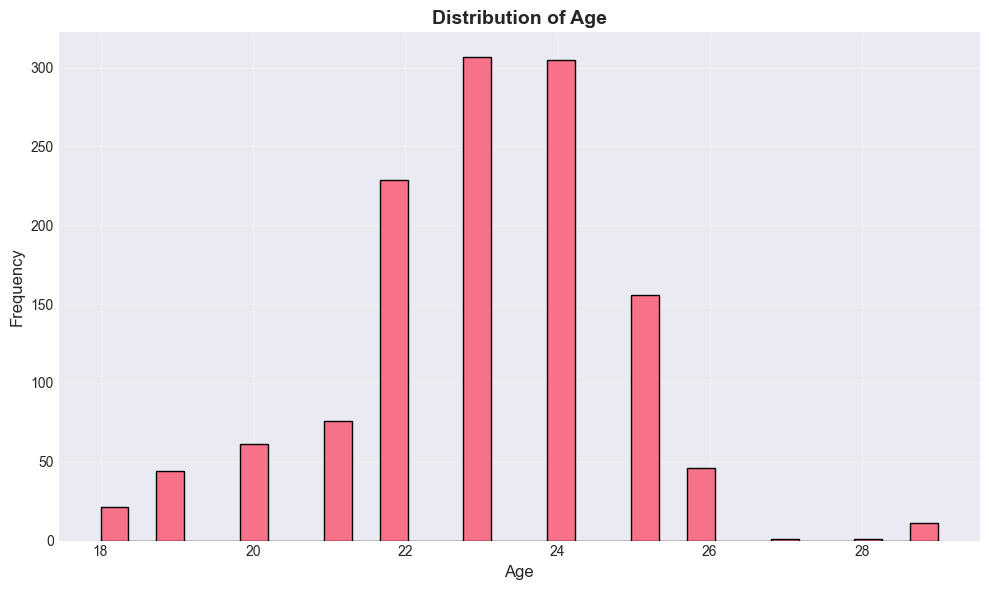

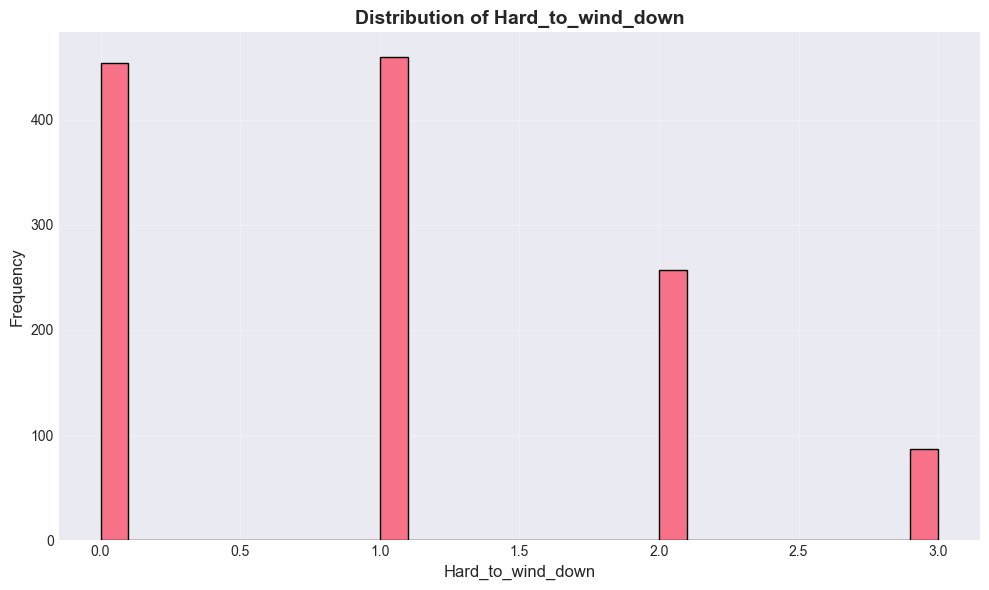

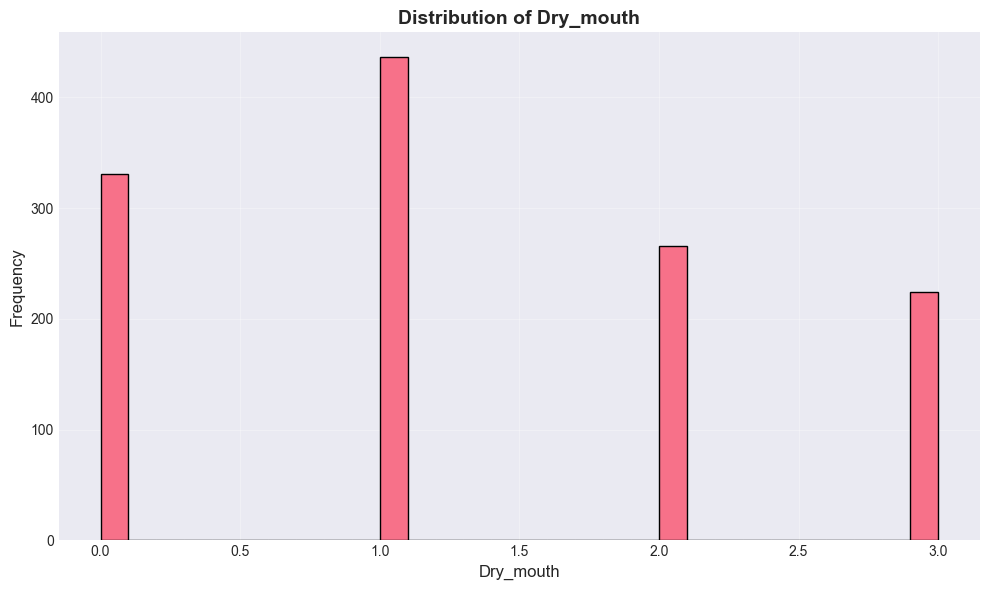

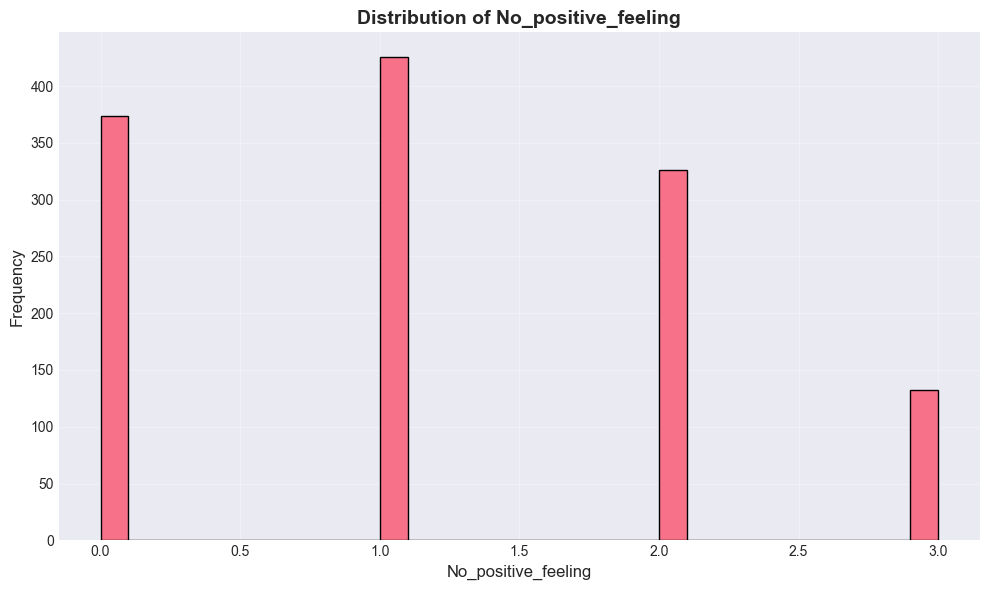

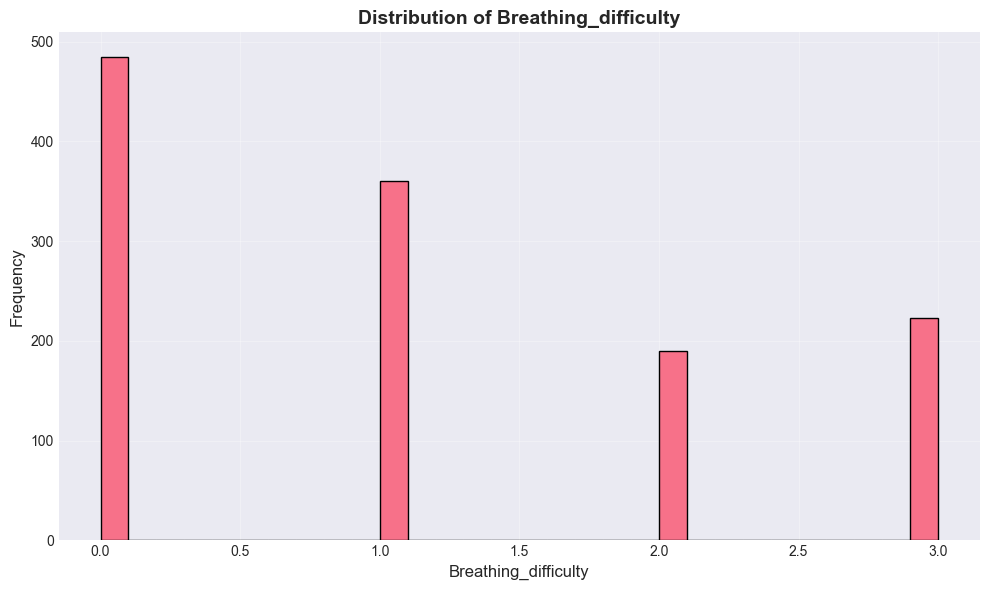

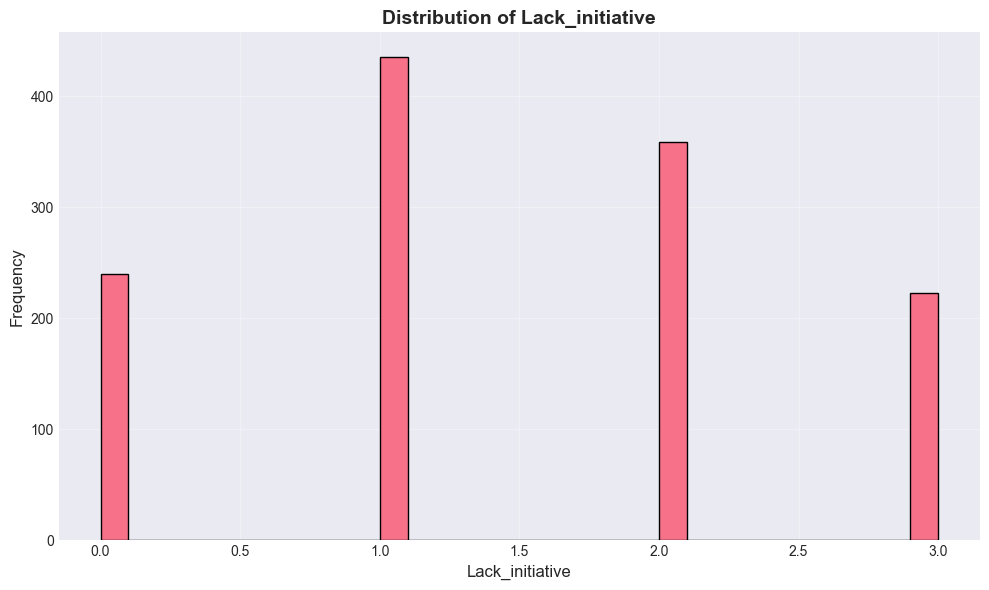

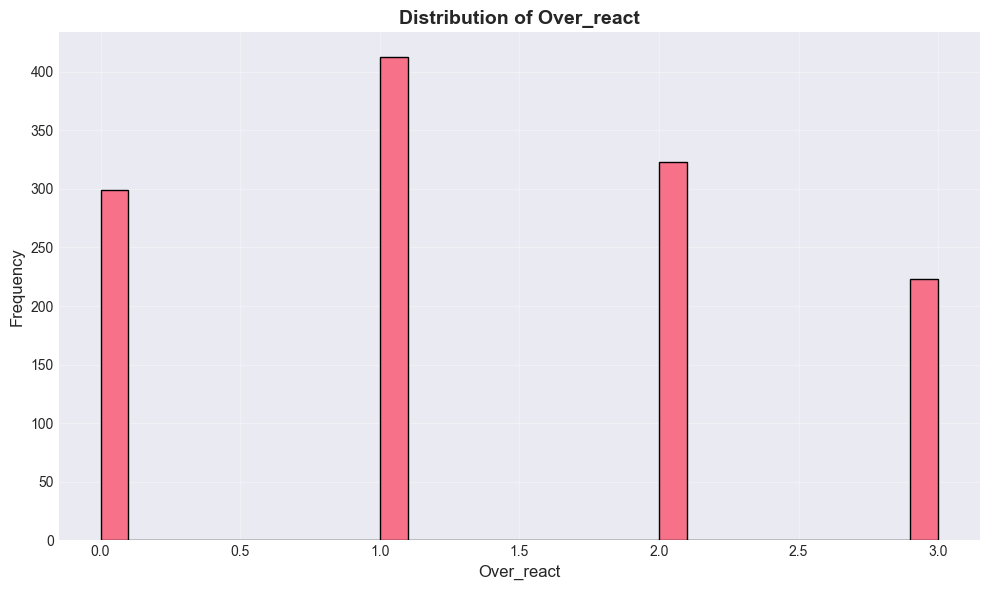

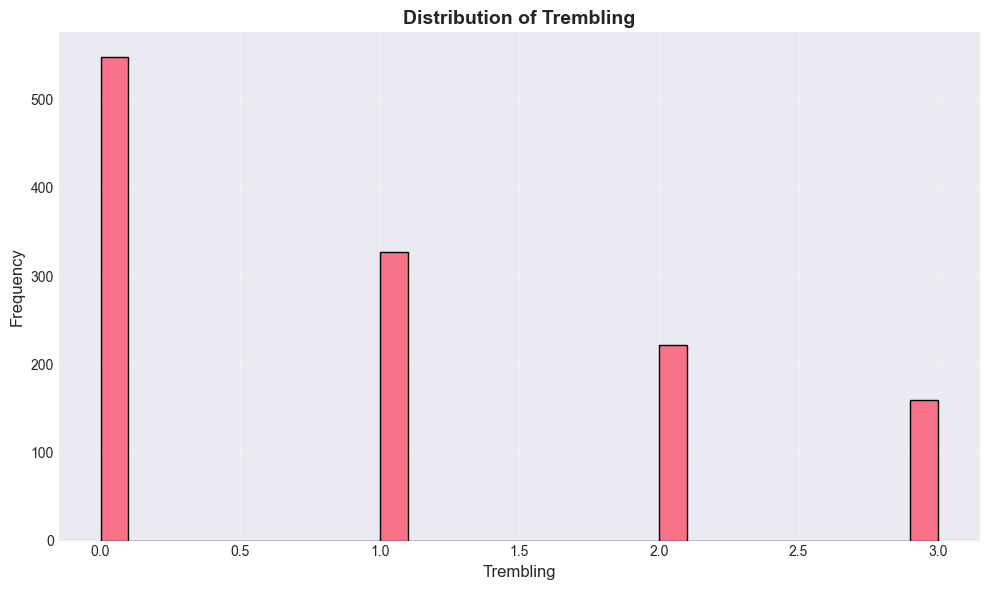

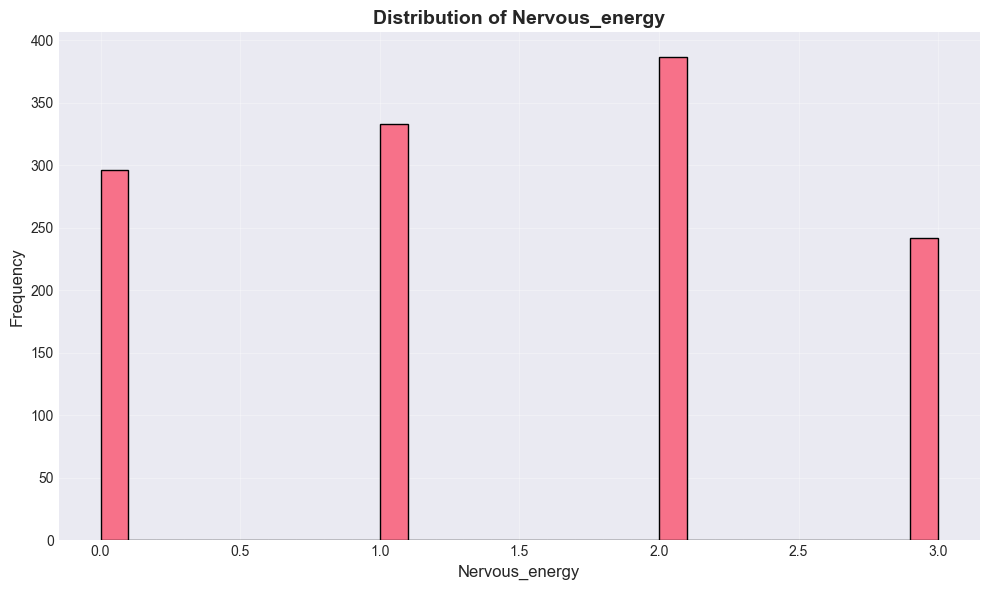

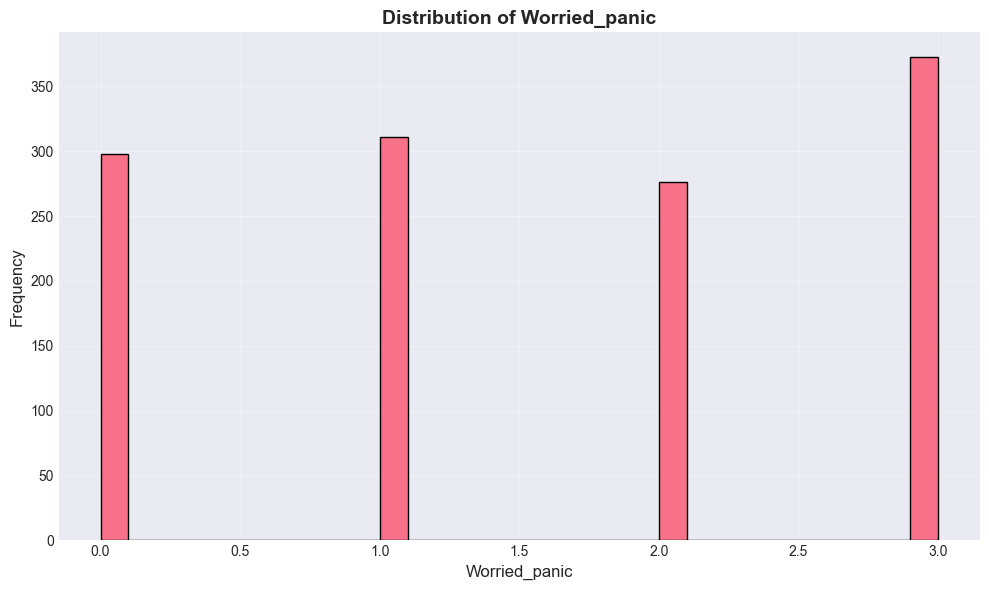

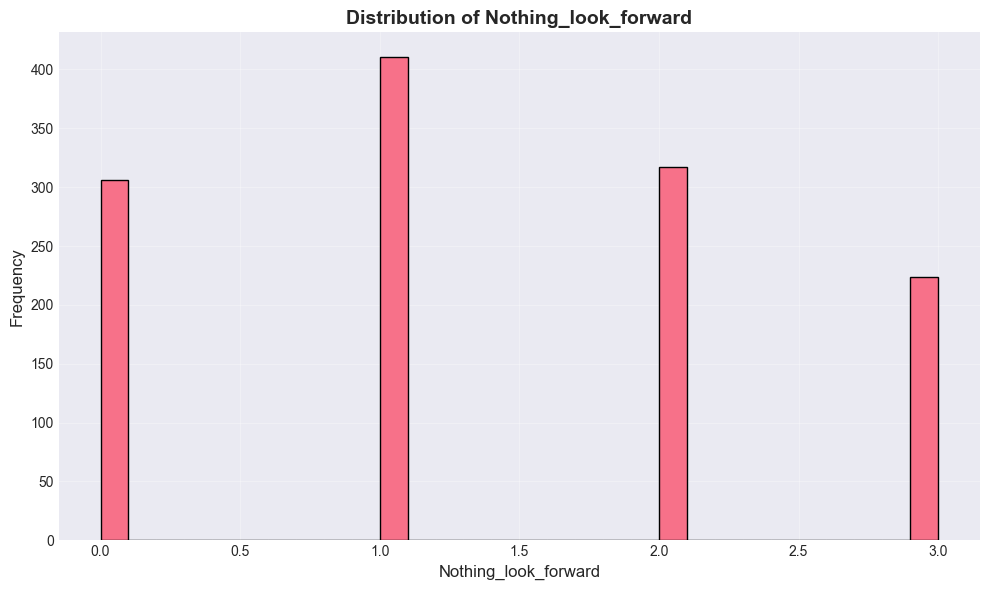

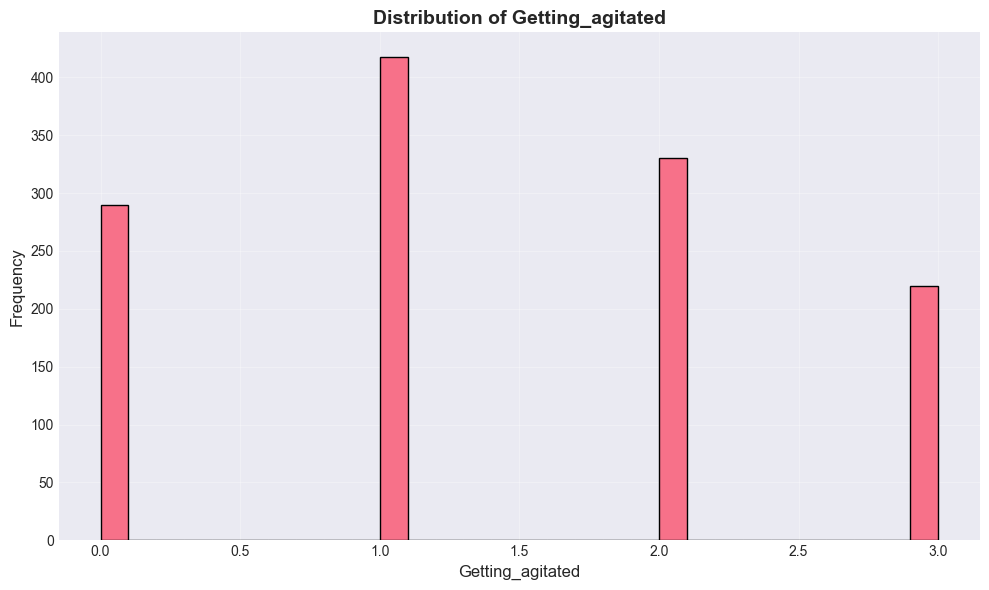

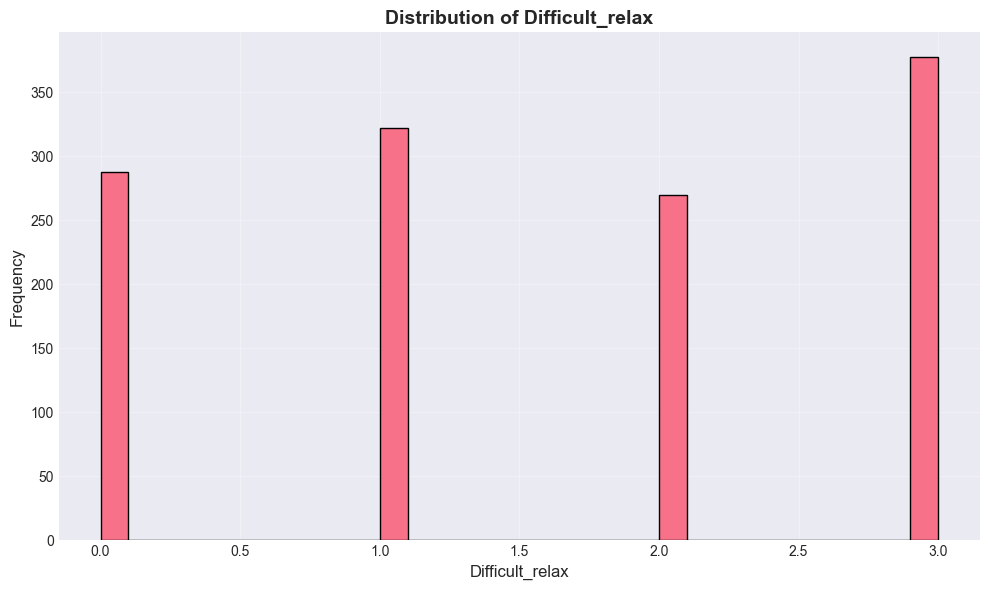

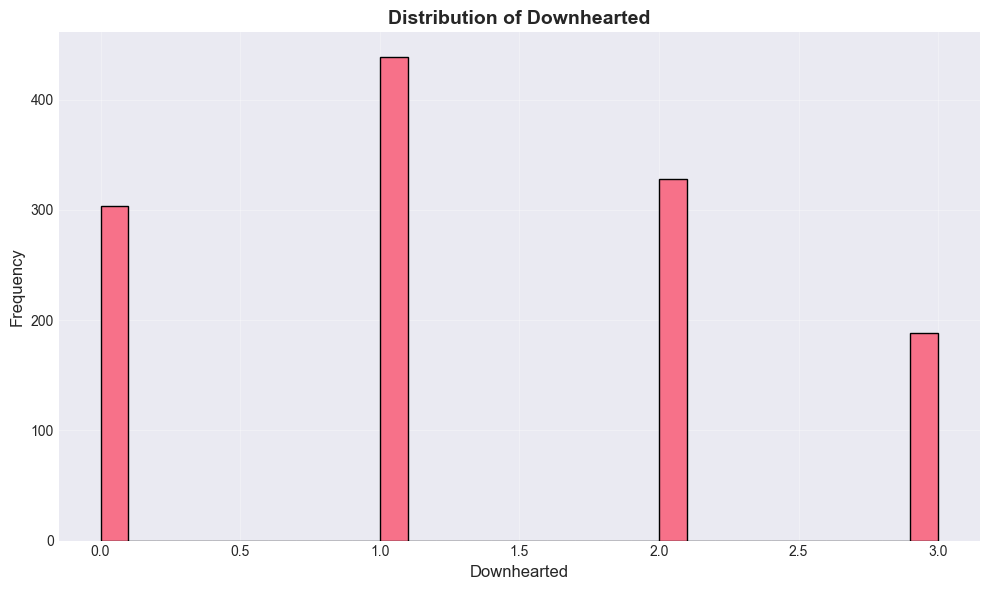

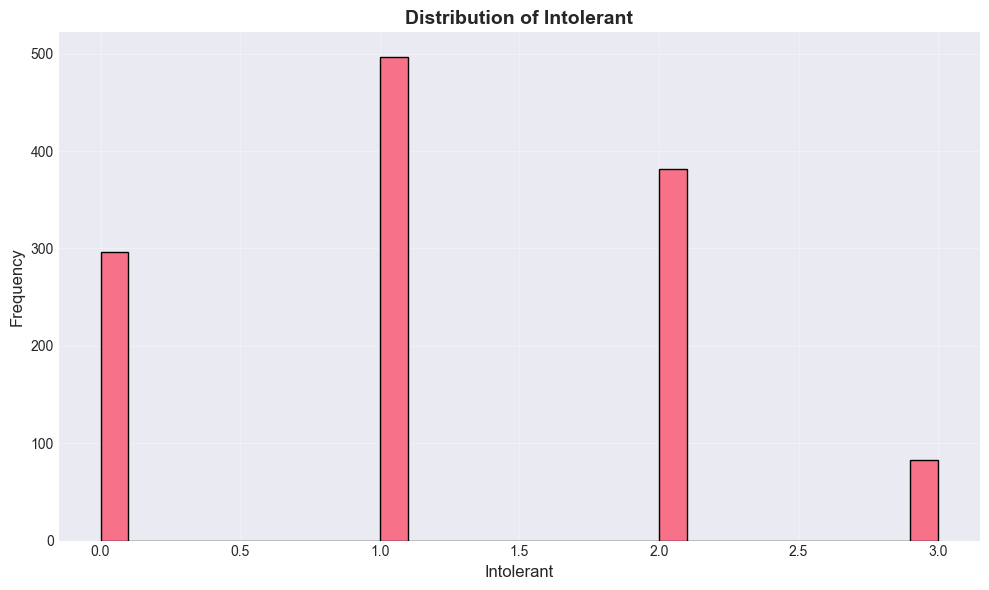

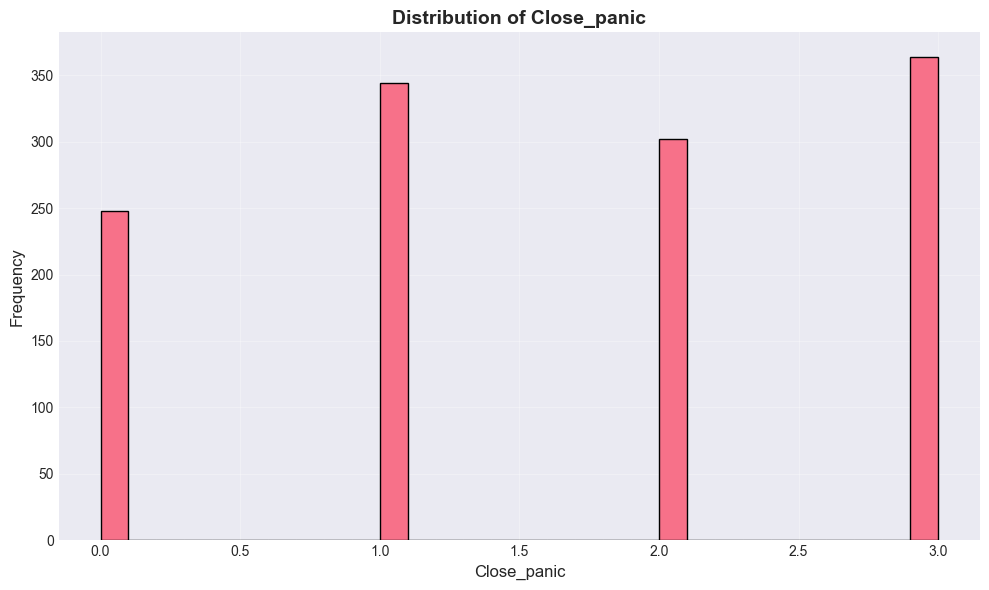

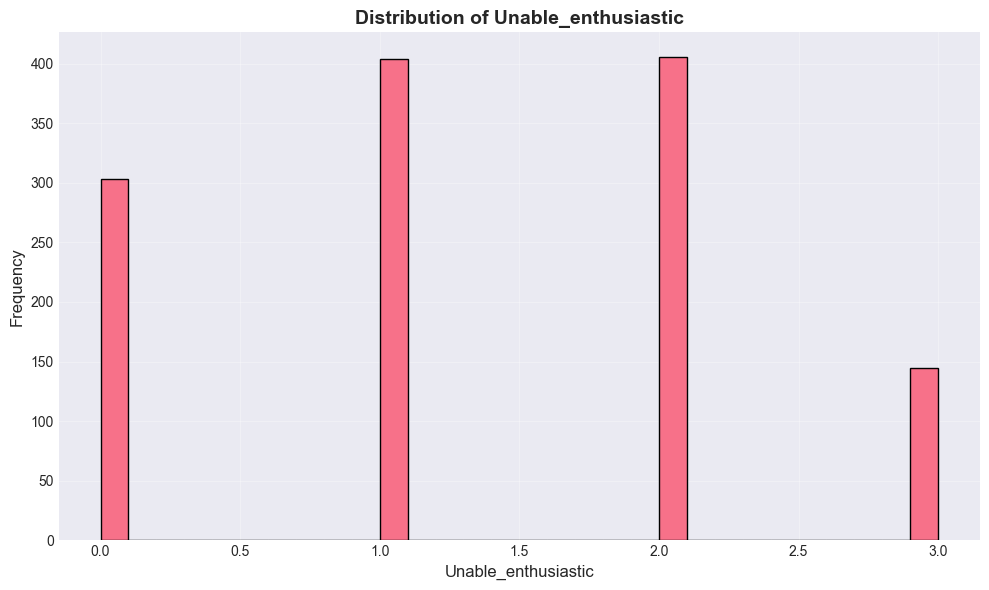

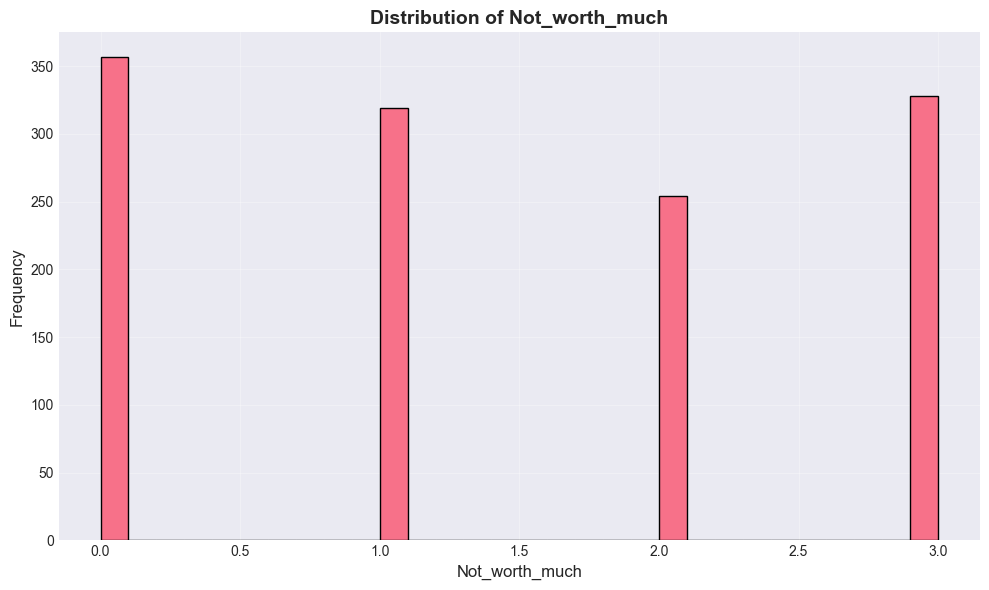

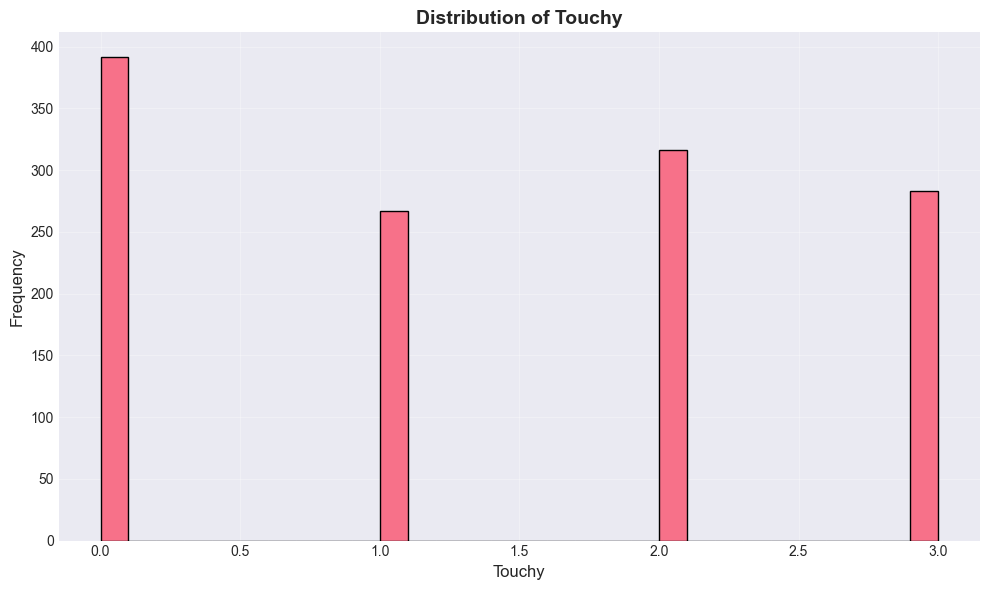

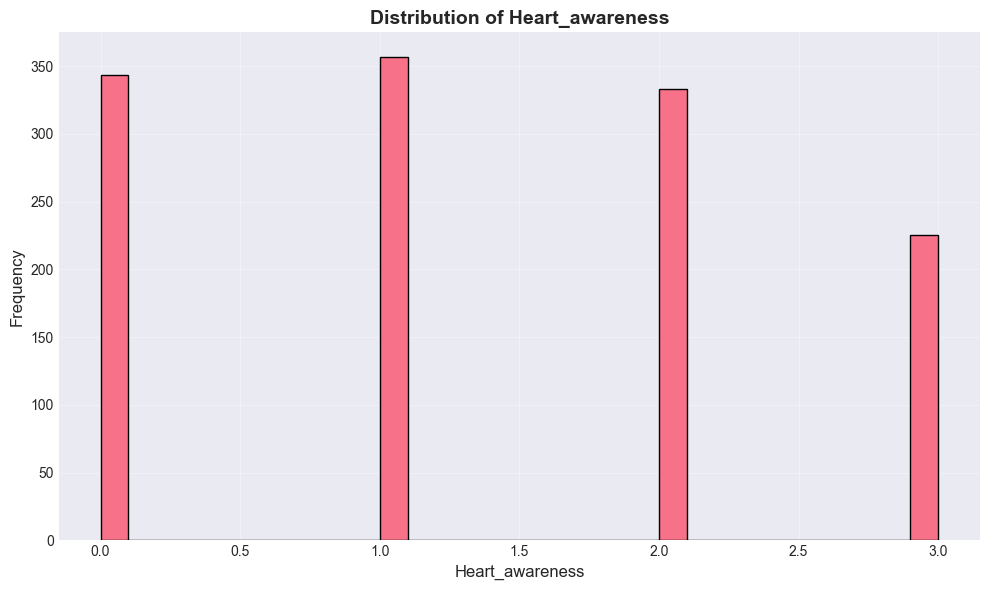

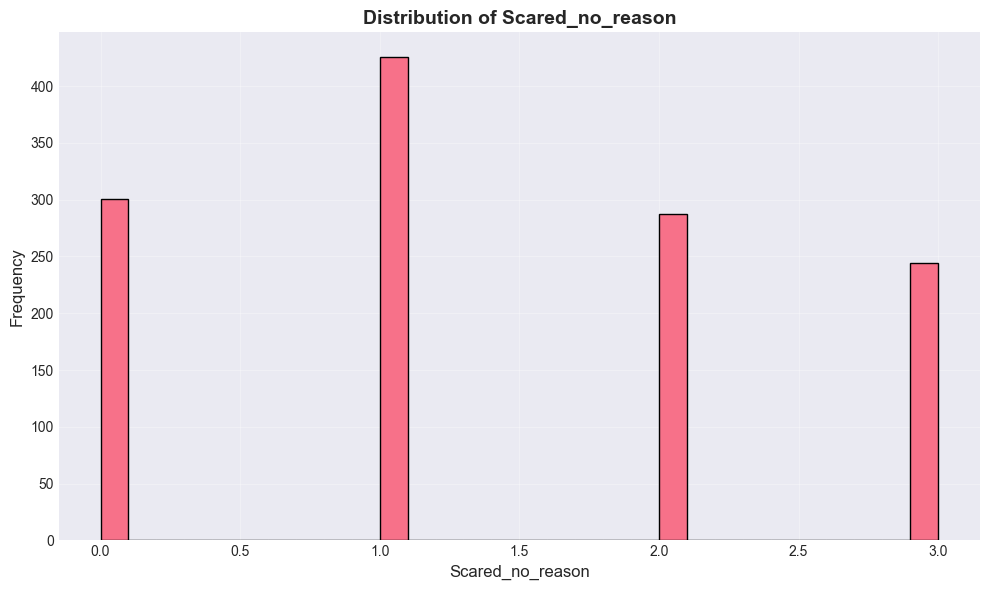

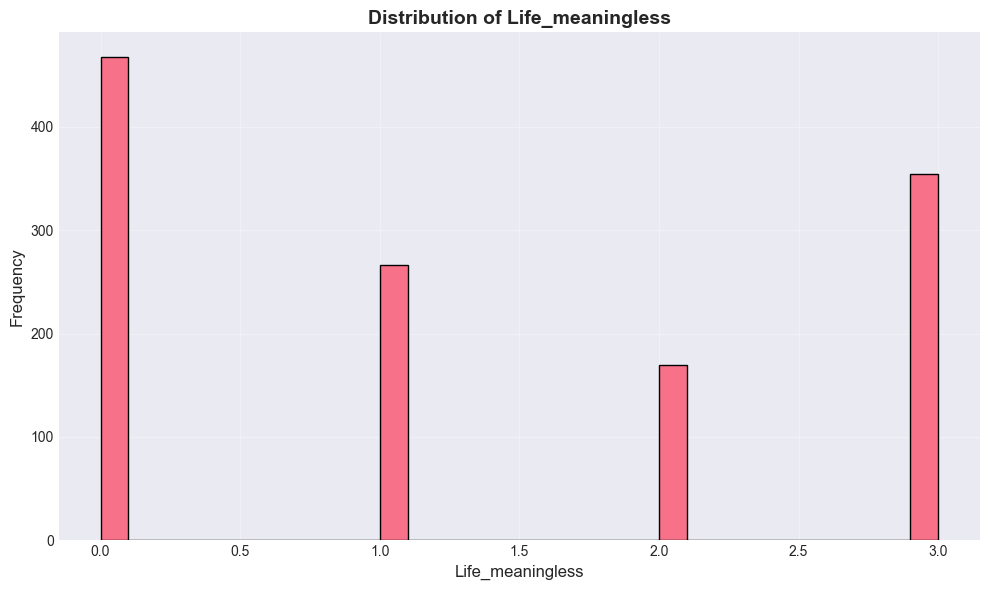

In [53]:
# Distribution of numerical variables - Print each diagram separately
if len(numerical_cols) > 0:
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print()  # Add spacing between plots
else:
    print("No numerical columns found for distribution plots.")


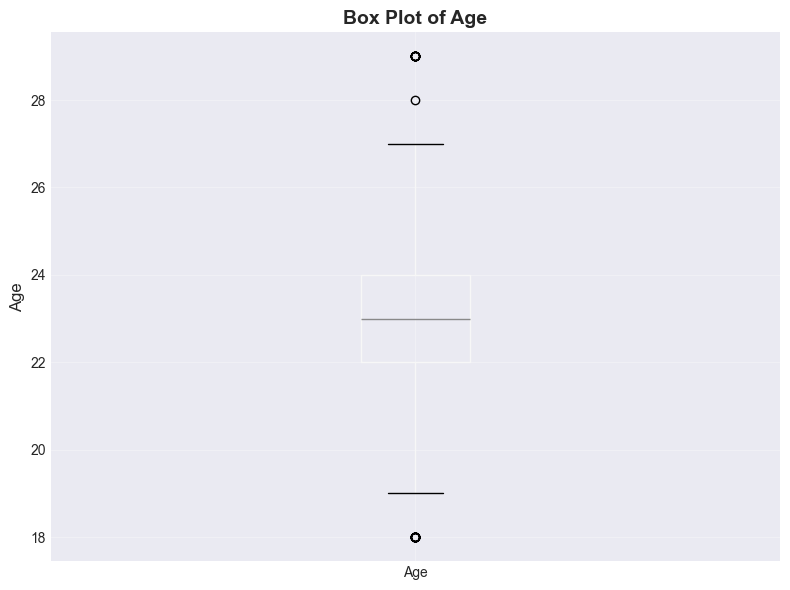

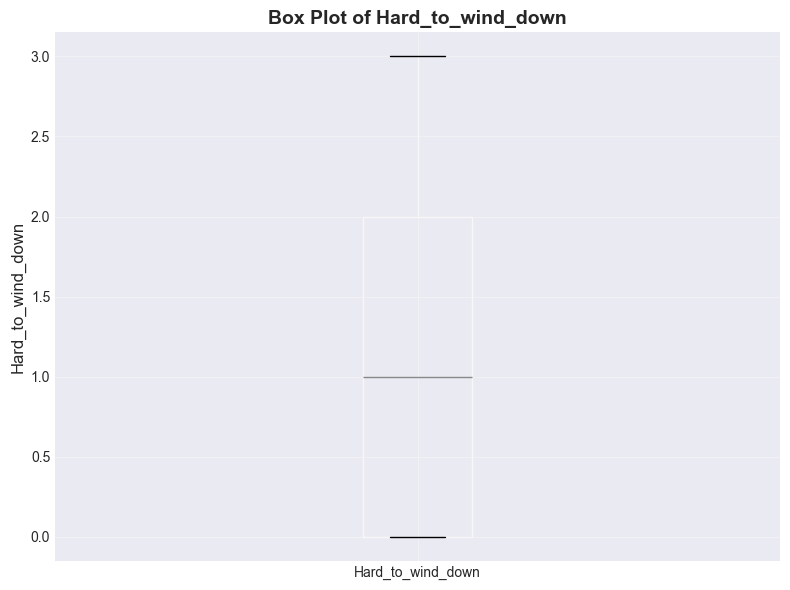

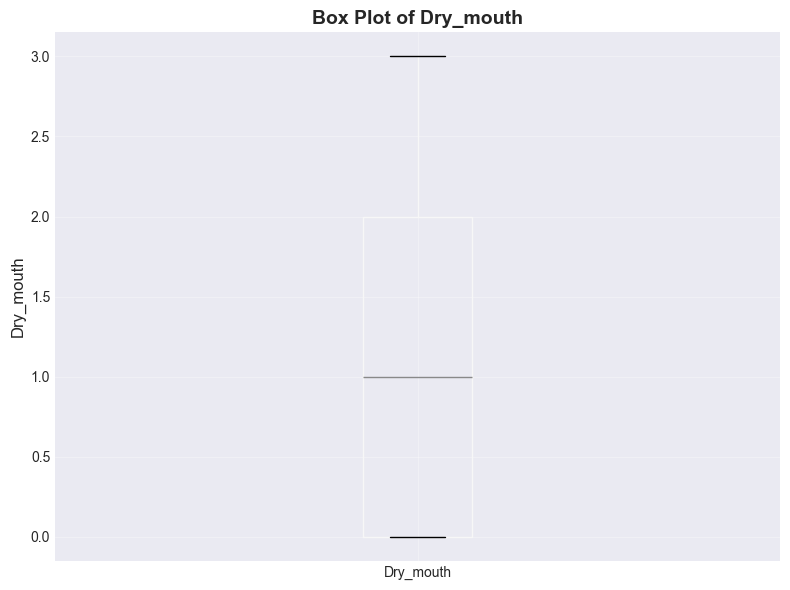

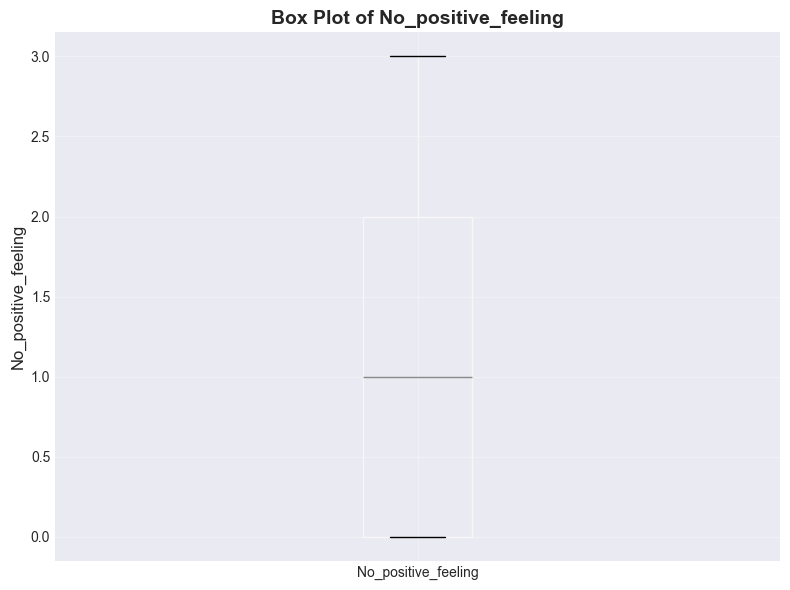

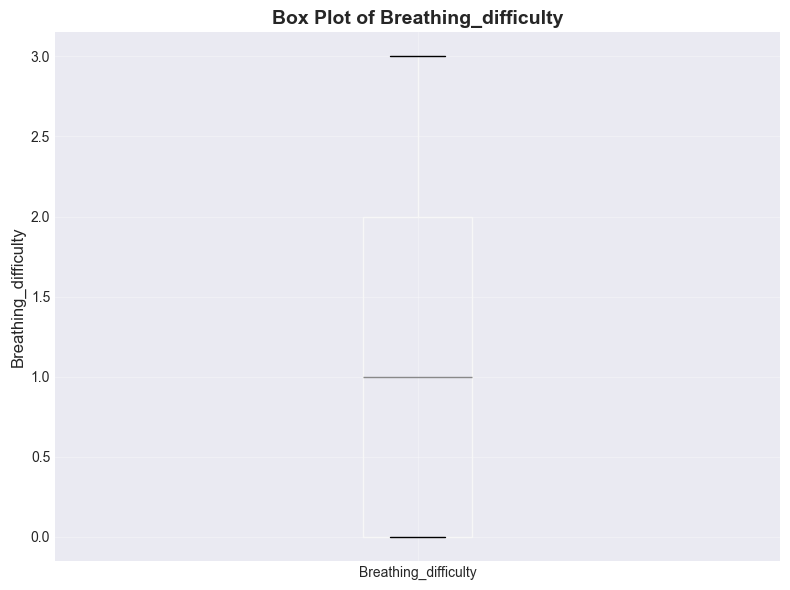

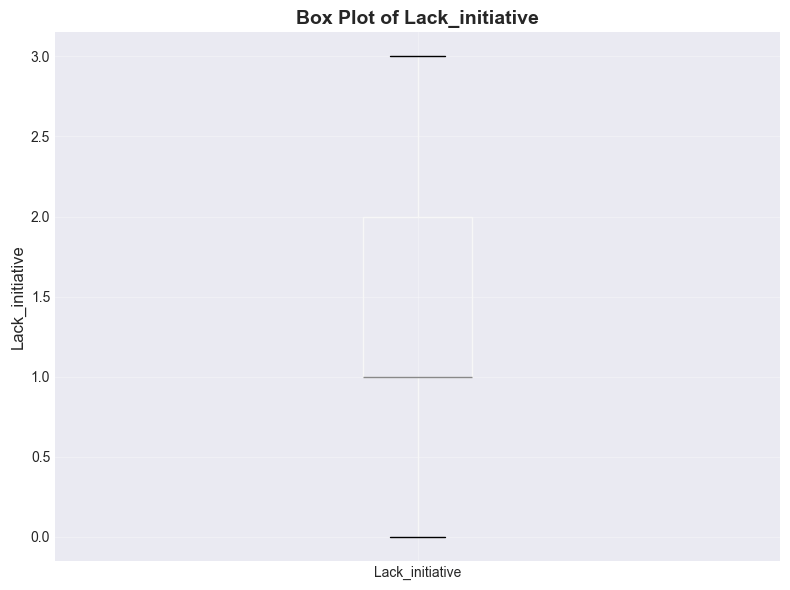

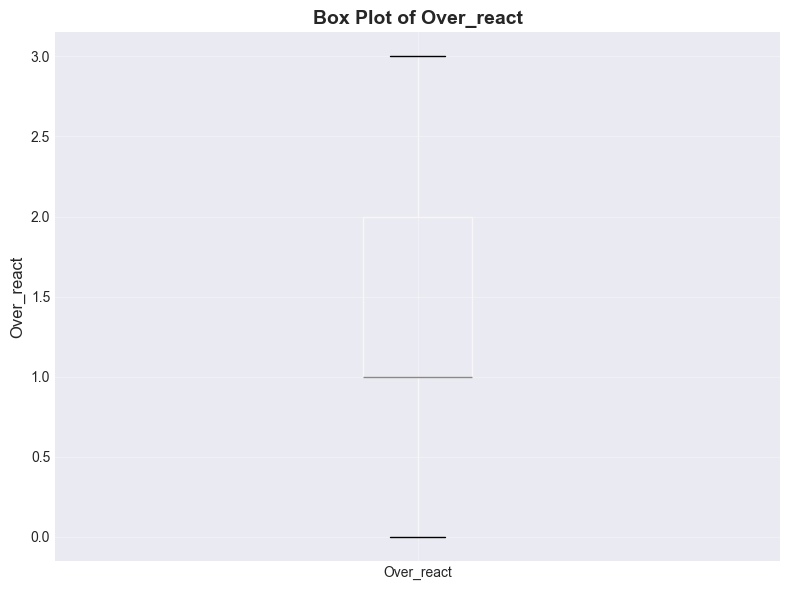

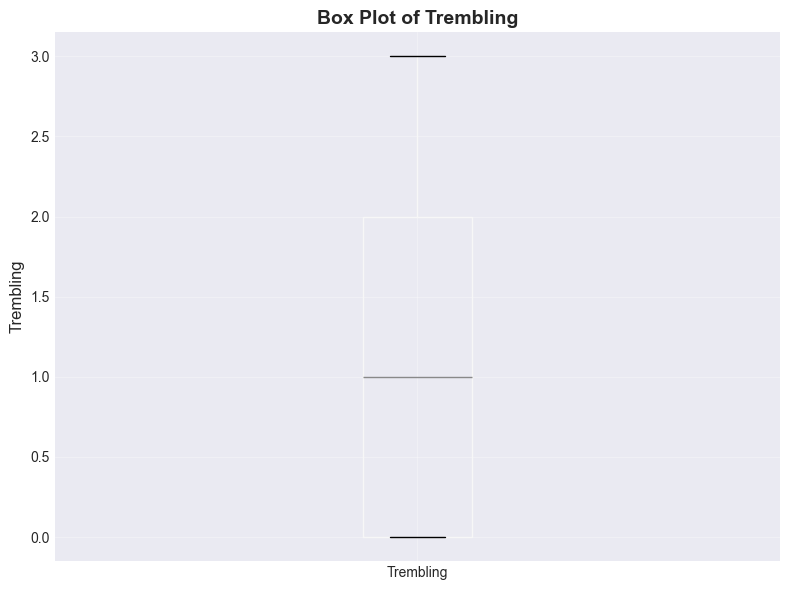

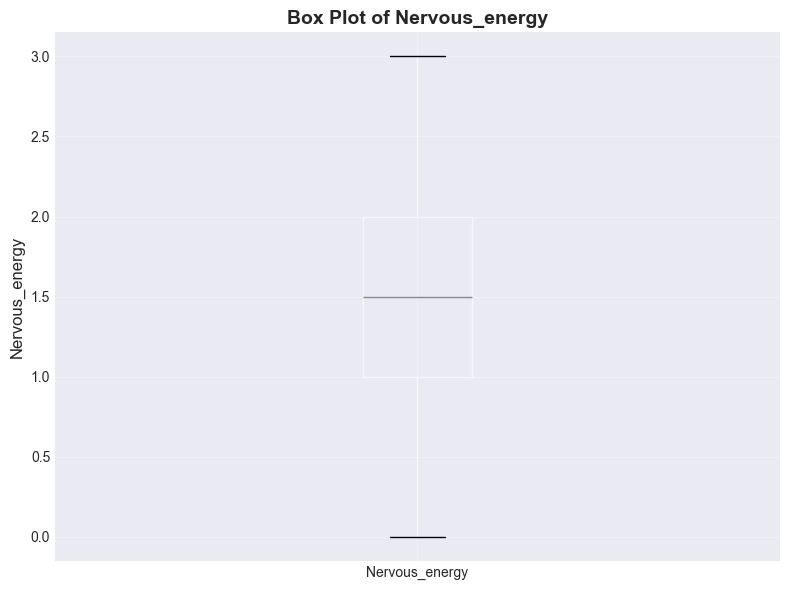

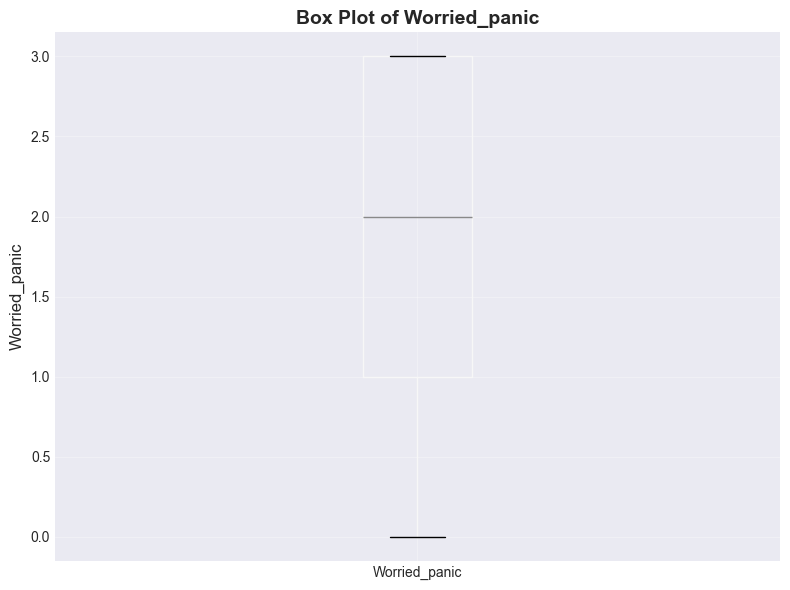

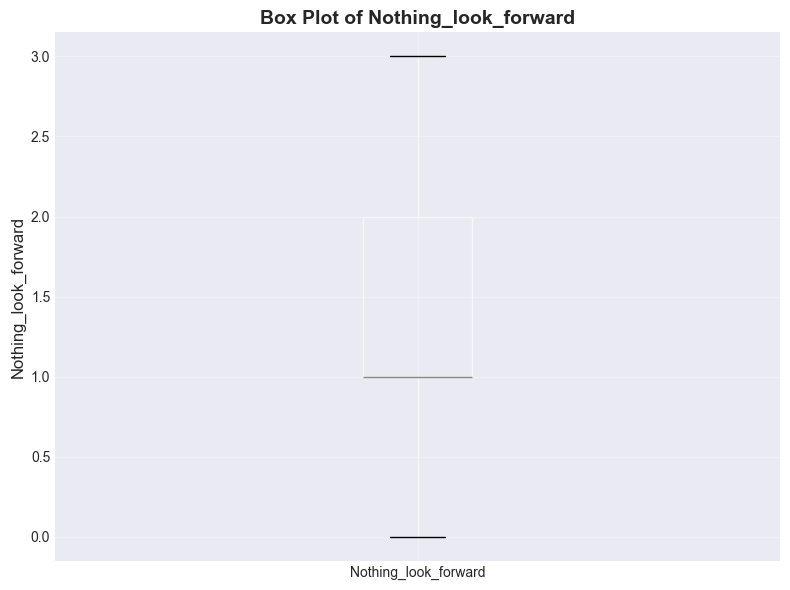

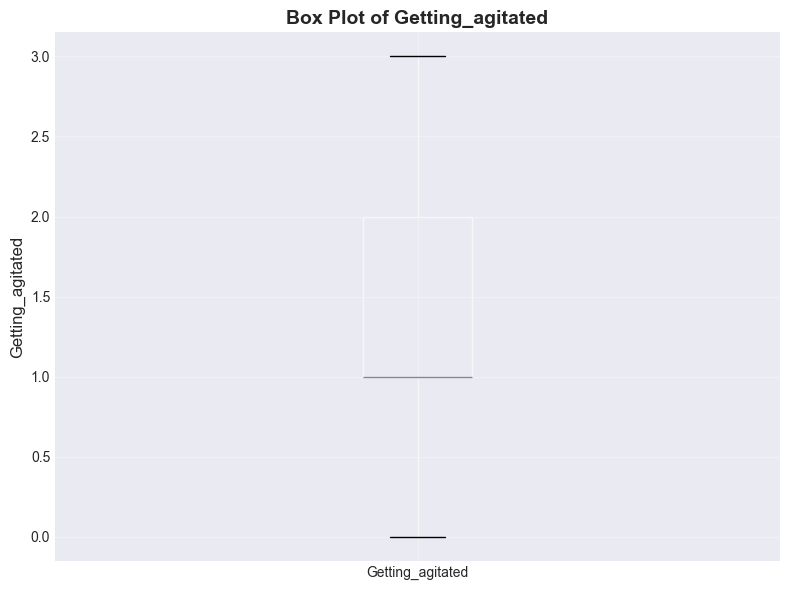

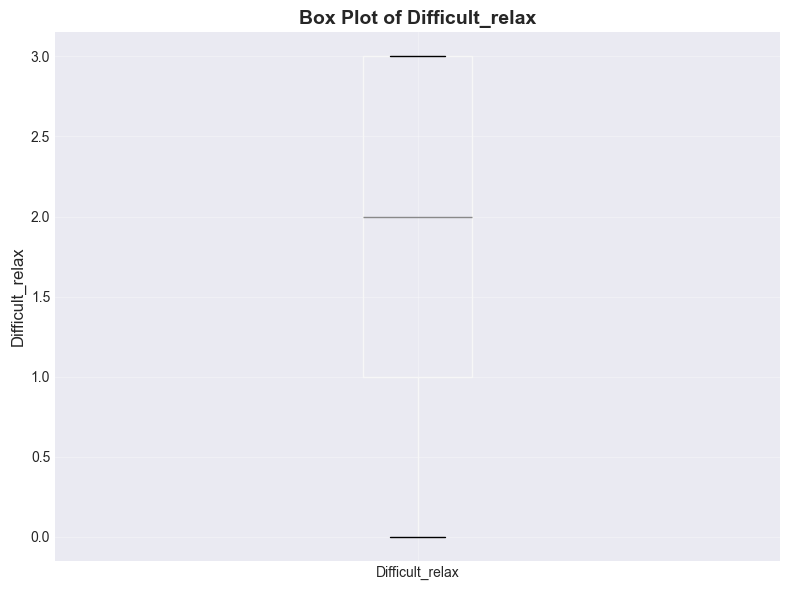

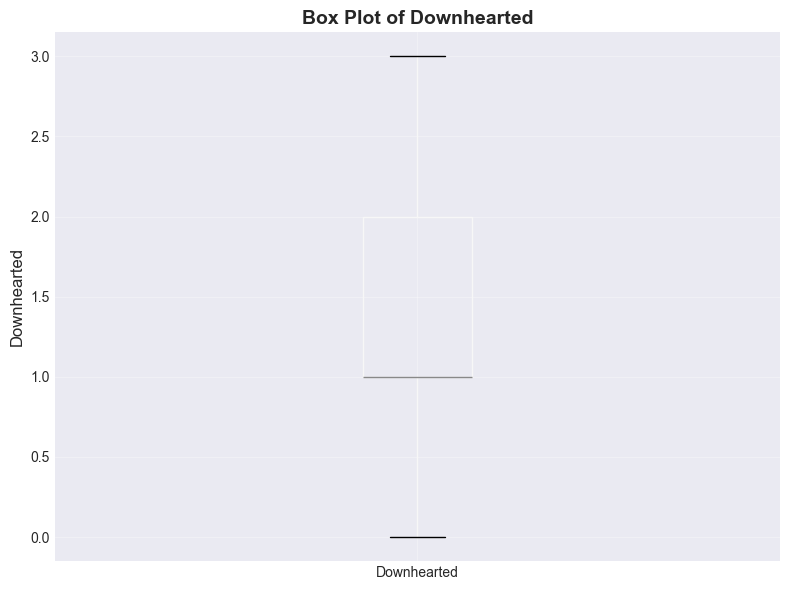

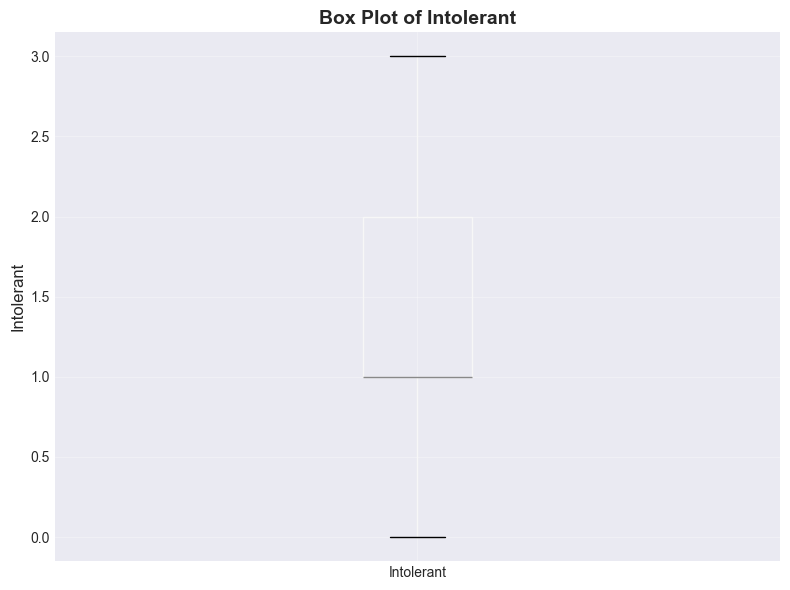

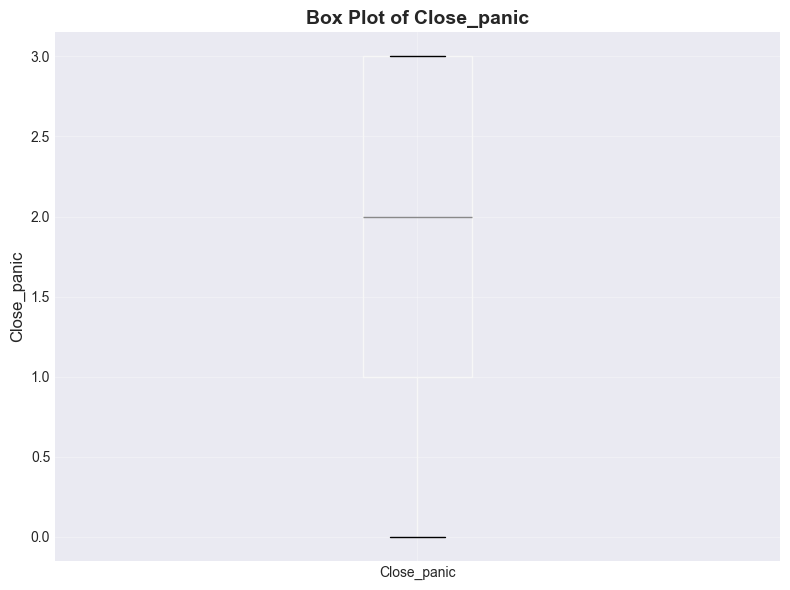

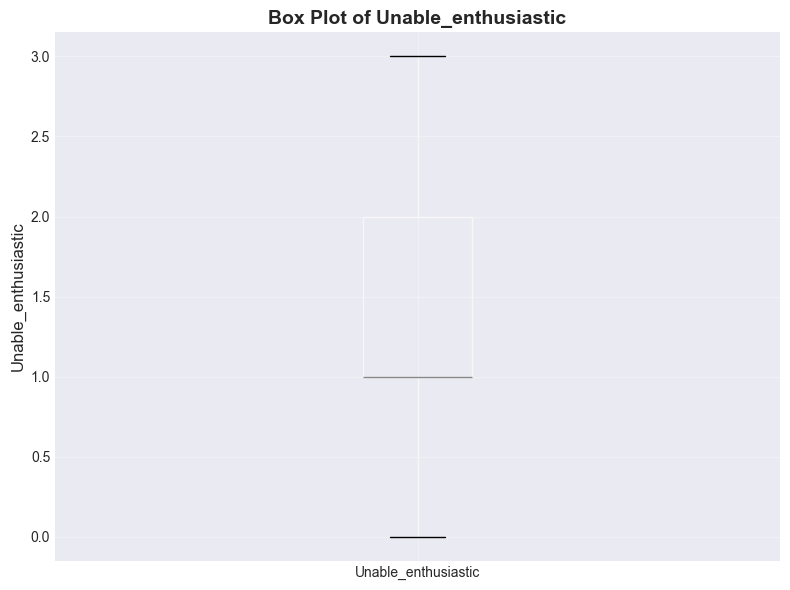

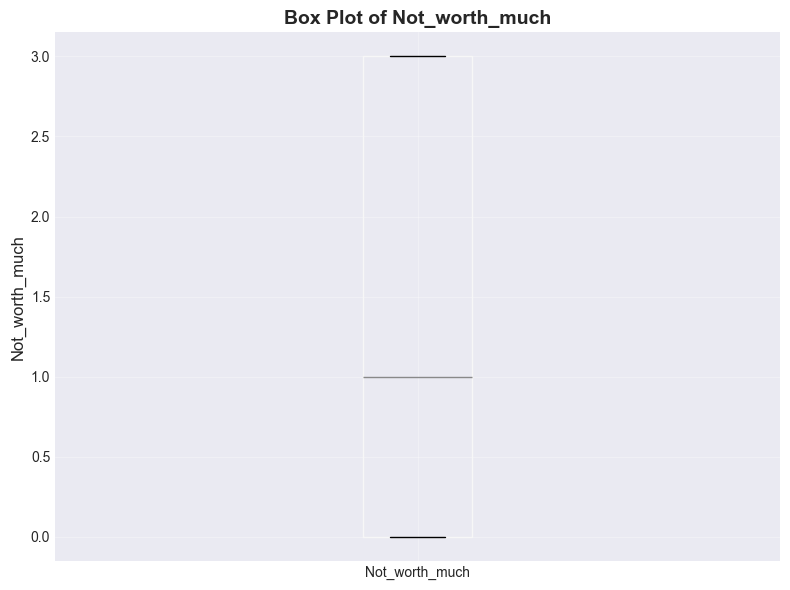

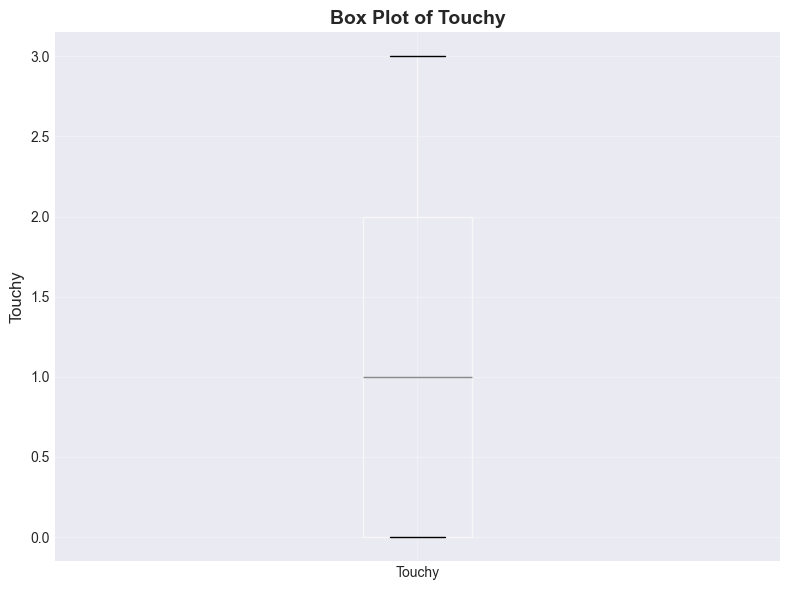

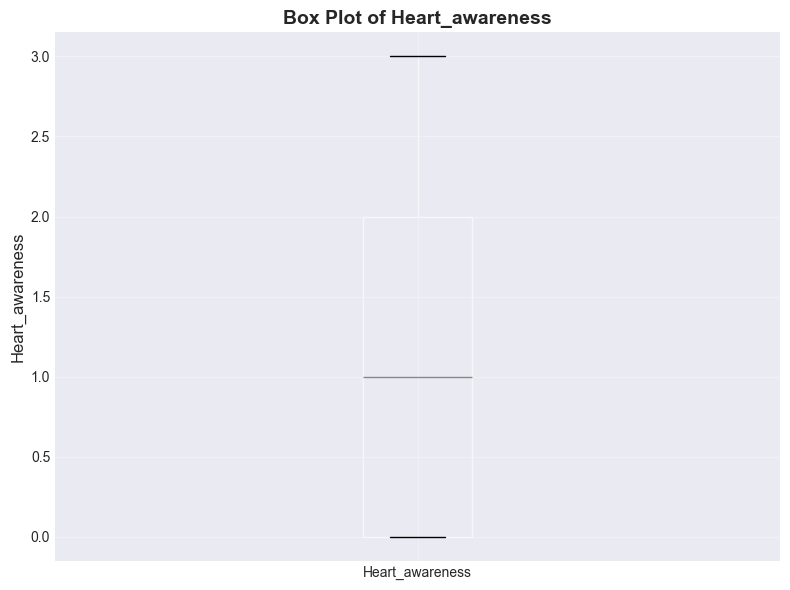

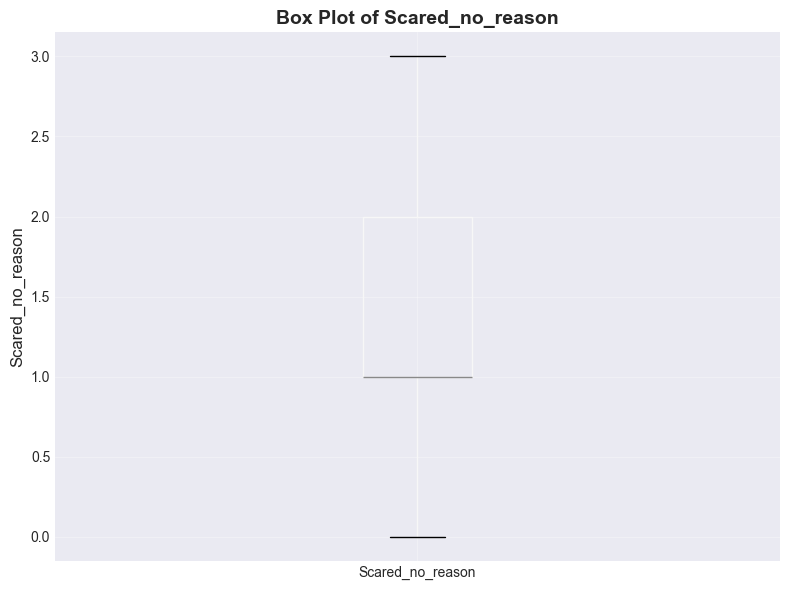

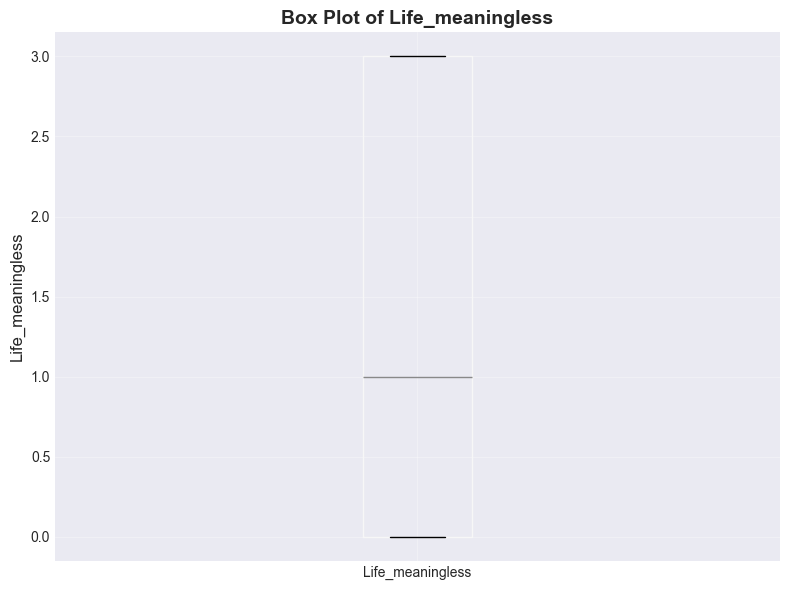

In [54]:
# Box plots for numerical variables to detect outliers - Print each diagram separately
if len(numerical_cols) > 0:
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=col)
        plt.title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
        plt.ylabel(col, fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print()  # Add spacing between plots
else:
    print("No numerical columns found for box plots.")


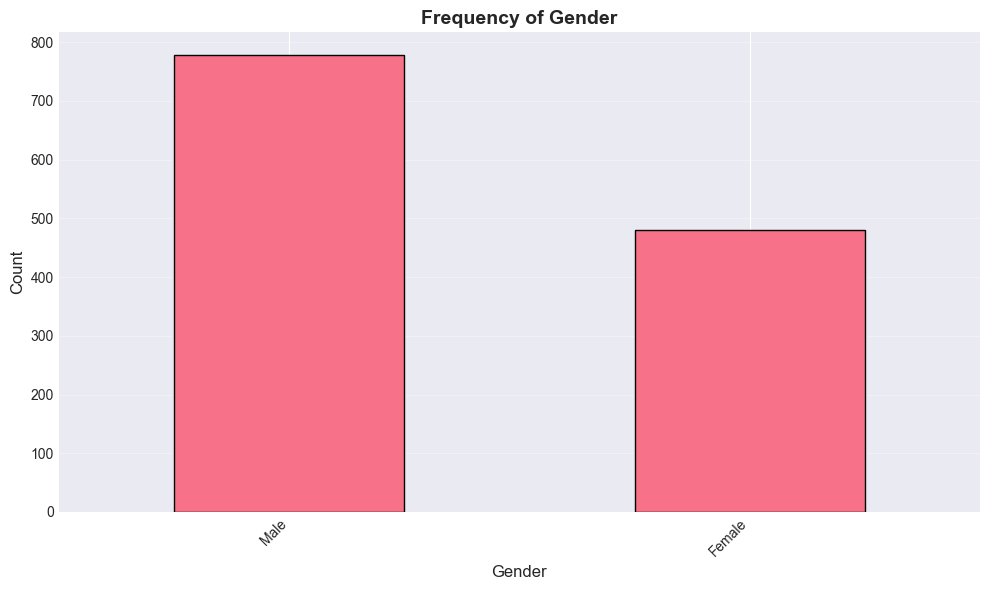



Value Counts for Categorical Variables:

Gender:
Gender
Male      778
Female    480
Name: count, dtype: int64
Unique values: 2


In [55]:
# Categorical variable analysis - Print each diagram separately
if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', edgecolor='black')
        plt.title(f'Frequency of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        print()  # Add spacing between plots
    
    # Print value counts for categorical variables
    print("\nValue Counts for Categorical Variables:")
    print("="*80)
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")
else:
    print("No categorical columns found.")


## 4. Bivariate Analysis


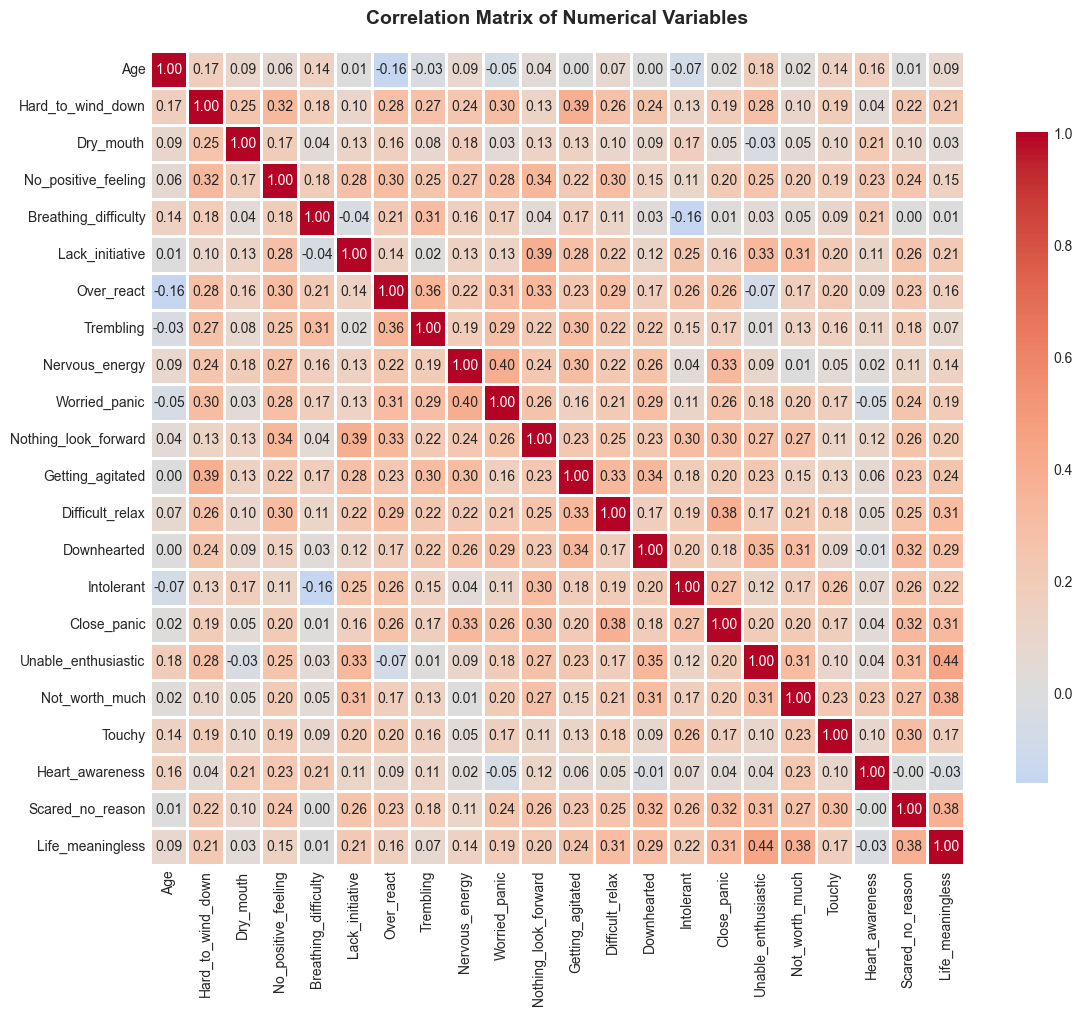


Correlation Matrix:
                           Age  Hard_to_wind_down  Dry_mouth  \
Age                   1.000000           0.165656   0.090003   
Hard_to_wind_down     0.165656           1.000000   0.251023   
Dry_mouth             0.090003           0.251023   1.000000   
No_positive_feeling   0.060518           0.320582   0.174364   
Breathing_difficulty  0.140157           0.183339   0.039743   
Lack_initiative       0.007439           0.104270   0.125662   
Over_react           -0.162996           0.276900   0.161286   
Trembling            -0.033750           0.270733   0.082616   
Nervous_energy        0.085545           0.238827   0.175754   
Worried_panic        -0.046339           0.301388   0.034896   
Nothing_look_forward  0.040603           0.125733   0.130696   
Getting_agitated      0.003328           0.390265   0.133599   
Difficult_relax       0.070252           0.264728   0.100804   
Downhearted           0.002993           0.241462   0.093515   
Intolerant         

In [56]:
# Correlation matrix for numerical variables
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print correlation values
    print("\nCorrelation Matrix:")
    print("="*80)
    print(correlation_matrix)
elif len(numerical_cols) == 1:
    print("Only one numerical column found. Cannot create correlation matrix.")
else:
    print("No numerical columns found for correlation analysis.")


No DASS-related columns identified. Showing scatter plots for first few numerical columns.


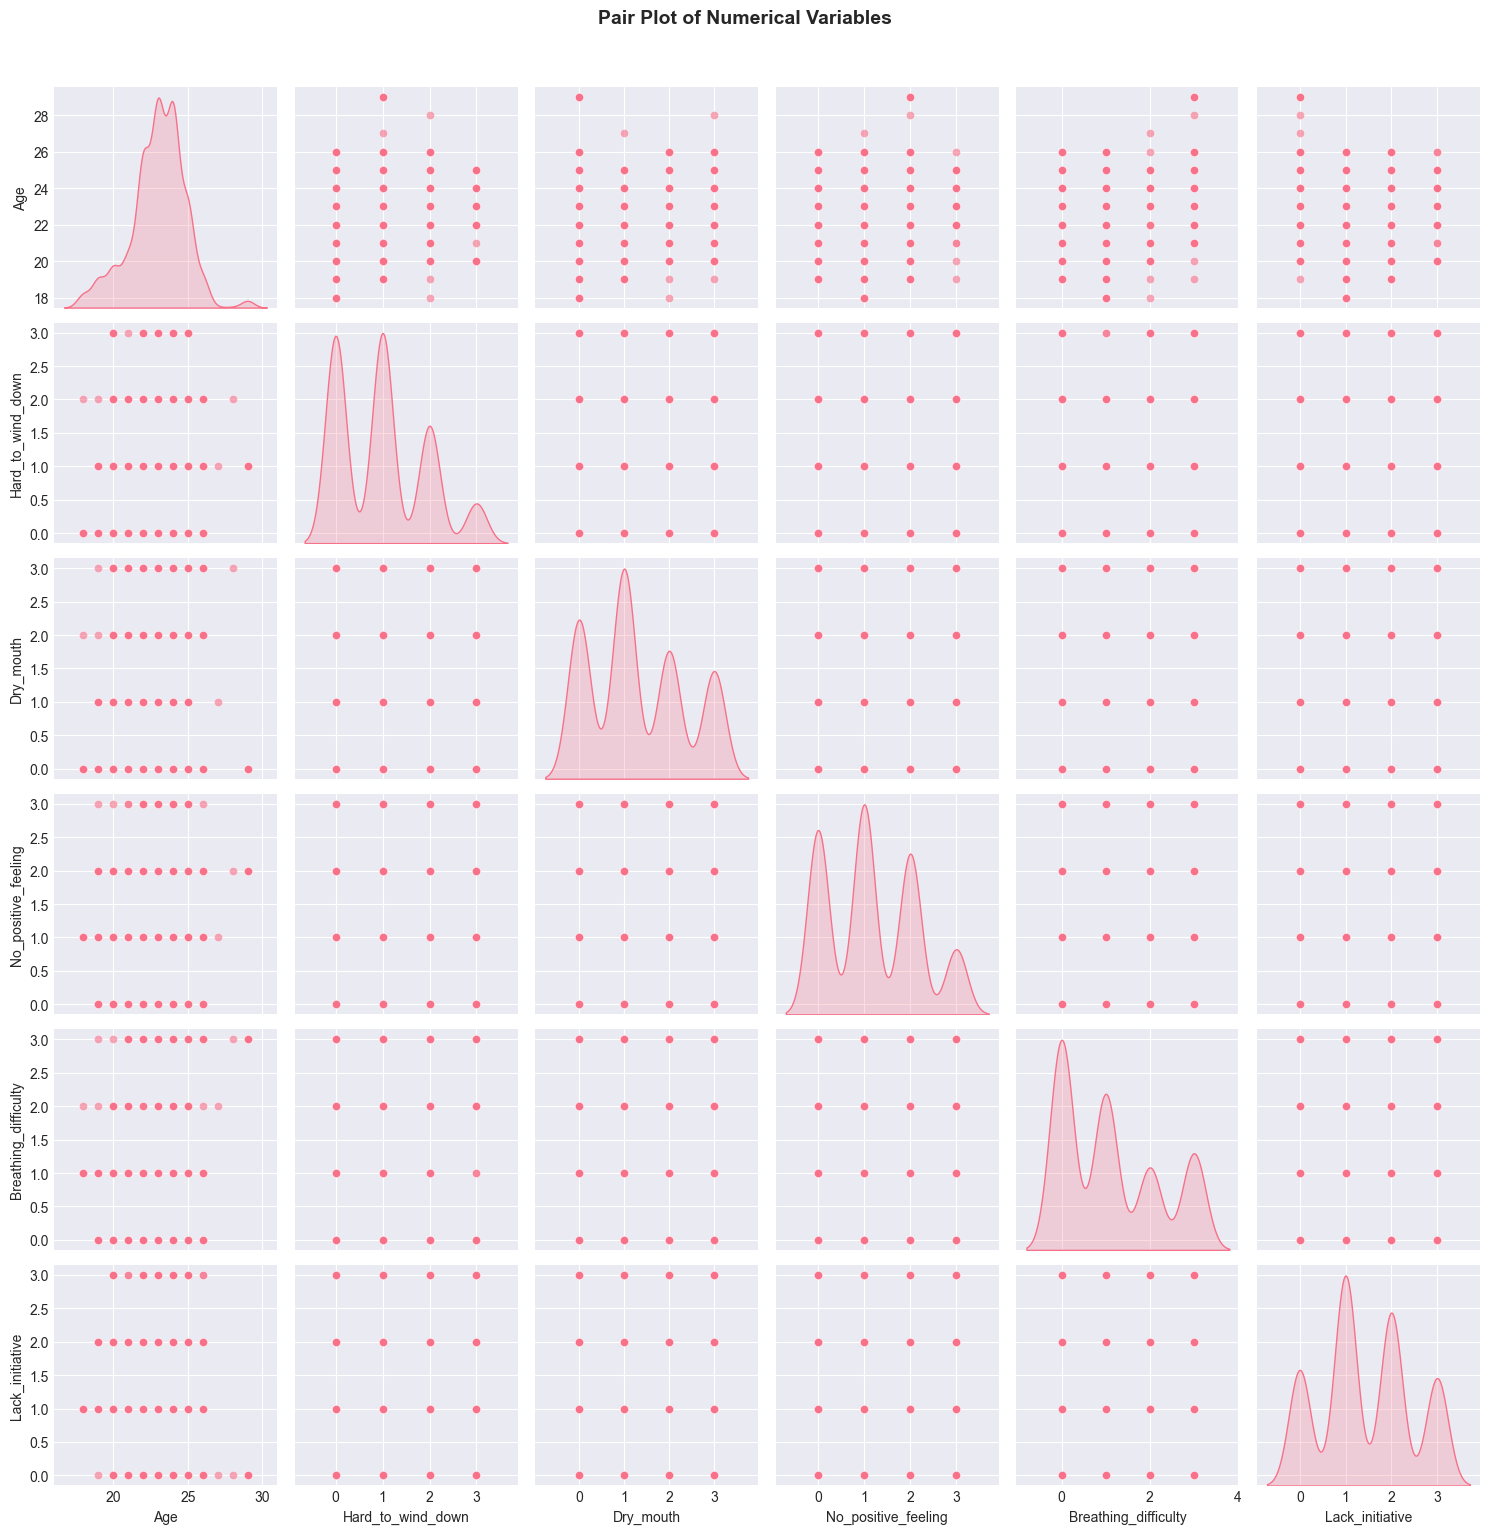

In [57]:
# Scatter plots for key numerical variables (if applicable)
# Focus on DASS-21 related columns (Depression, Anxiety, Stress)
dass_keywords = ['depression', 'anxiety', 'stress', 'dass', 'DASS']
dass_cols = [col for col in numerical_cols if any(keyword.lower() in col.lower() for keyword in dass_keywords)]

if len(dass_cols) >= 2:
    # Create scatter plot matrix for DASS variables
    if len(dass_cols) <= 6:  # Limit to 6 variables for readability
        sns.pairplot(df[dass_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of DASS-21 Related Variables', y=1.02, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        # If too many, show first 6
        sns.pairplot(df[dass_cols[:6]], diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of DASS-21 Related Variables (First 6)', y=1.02, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
elif len(dass_cols) > 0:
    print(f"Found {len(dass_cols)} DASS-related column(s). Need at least 2 for pair plot.")
else:
    print("No DASS-related columns identified. Showing scatter plots for first few numerical columns.")
    if len(numerical_cols) >= 2:
        sns.pairplot(df[numerical_cols[:min(6, len(numerical_cols))]], diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()


## 5. Advanced Analysis


In [58]:
# Check for duplicates
print("Duplicate Analysis:")
print("="*80)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found.")


Duplicate Analysis:
Number of duplicate rows: 1003
Percentage of duplicates: 79.73%

Duplicate rows:
      Gender  Age  Hard_to_wind_down  Dry_mouth  No_positive_feeling  \
132     Male   26                  0          0                    0   
166     Male   22                  1          0                    1   
245   Female   22                  0          0                    0   
258     Male   24                  2          2                    2   
259   Female   24                  0          2                    0   
...      ...  ...                ...        ...                  ...   
1253    Male   25                  1          2                    1   
1254    Male   23                  1          0                    1   
1255    Male   24                  0          3                    1   
1256  Female   23                  2          3                    0   
1257  Female   24                  1          0                    2   

      Breathing_difficulty  Lack_i

In [59]:
# Outlier detection using IQR method
print("\nOutlier Detection (IQR Method):")
print("="*80)
if len(numerical_cols) > 0:
    outlier_summary = []
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        outlier_summary.append({
            'Column': col,
            'Outliers': outlier_count,
            'Percentage': f'{outlier_percent:.2f}%',
            'Lower Bound': f'{lower_bound:.2f}',
            'Upper Bound': f'{upper_bound:.2f}'
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    print(outlier_df.to_string(index=False))
else:
    print("No numerical columns found for outlier detection.")



Outlier Detection (IQR Method):
              Column  Outliers Percentage Lower Bound Upper Bound
                 Age        33      2.62%       19.00       27.00
   Hard_to_wind_down         0      0.00%       -3.00        5.00
           Dry_mouth         0      0.00%       -3.00        5.00
 No_positive_feeling         0      0.00%       -3.00        5.00
Breathing_difficulty         0      0.00%       -3.00        5.00
     Lack_initiative         0      0.00%       -0.50        3.50
          Over_react         0      0.00%       -0.50        3.50
           Trembling         0      0.00%       -3.00        5.00
      Nervous_energy         0      0.00%       -0.50        3.50
       Worried_panic         0      0.00%       -2.00        6.00
Nothing_look_forward         0      0.00%       -0.50        3.50
    Getting_agitated         0      0.00%       -0.50        3.50
     Difficult_relax         0      0.00%       -2.00        6.00
         Downhearted         0      0.00%  

In [60]:
# Skewness and Kurtosis analysis
print("\nSkewness and Kurtosis Analysis:")
print("="*80)
if len(numerical_cols) > 0:
    from scipy import stats
    skewness_kurtosis = []
    for col in numerical_cols:
        skew = df[col].skew()
        kurt = df[col].kurtosis()
        skewness_kurtosis.append({
            'Column': col,
            'Skewness': f'{skew:.3f}',
            'Kurtosis': f'{kurt:.3f}',
            'Skewness Interpretation': 'Right skewed' if skew > 0.5 else 'Left skewed' if skew < -0.5 else 'Approximately normal'
        })
    
    skew_kurt_df = pd.DataFrame(skewness_kurtosis)
    print(skew_kurt_df.to_string(index=False))
else:
    print("No numerical columns found for skewness/kurtosis analysis.")



Skewness and Kurtosis Analysis:
              Column Skewness Kurtosis Skewness Interpretation
                 Age   -0.328    0.942    Approximately normal
   Hard_to_wind_down    0.574   -0.593            Right skewed
           Dry_mouth    0.302   -1.090    Approximately normal
 No_positive_feeling    0.335   -0.929    Approximately normal
Breathing_difficulty    0.541   -1.079            Right skewed
     Lack_initiative    0.100   -1.028    Approximately normal
          Over_react    0.176   -1.116    Approximately normal
           Trembling    0.654   -0.880            Right skewed
      Nervous_energy    0.002   -1.202    Approximately normal
       Worried_panic   -0.067   -1.422    Approximately normal
Nothing_look_forward    0.188   -1.125    Approximately normal
    Getting_agitated    0.166   -1.097    Approximately normal
     Difficult_relax   -0.069   -1.414    Approximately normal
         Downhearted    0.230   -1.008    Approximately normal
          Intolerant  

## 6. DASS-21 Specific Analysis


In [61]:
# Identify DASS-21 related columns
print("DASS-21 Related Columns:")
print("="*80)
dass_keywords = ['depression', 'anxiety', 'stress', 'dass', 'DASS', 'Depression', 'Anxiety', 'Stress']
dass_related_cols = [col for col in df.columns if any(keyword in col for keyword in dass_keywords)]

if len(dass_related_cols) > 0:
    print(f"Found {len(dass_related_cols)} DASS-21 related columns:")
    for col in dass_related_cols:
        print(f"  - {col}")
    
    # Summary statistics for DASS variables
    if len(dass_related_cols) > 0:
        print("\nSummary Statistics for DASS-21 Variables:")
        print("="*80)
        print(df[dass_related_cols].describe())
        
        # Visualize DASS variables - Print each diagram separately
        print("\nVisualizing DASS-21 Variables:")
        print("="*80)
        for col in dass_related_cols:
            plt.figure(figsize=(10, 6))
            df[col].hist(bins=20, edgecolor='black')
            plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
            plt.xlabel('Score', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            print()  # Add spacing between plots
else:
    print("No DASS-21 related columns found with standard naming.")
    print("All columns in dataset:")
    for col in df.columns:
        print(f"  - {col}")


DASS-21 Related Columns:
No DASS-21 related columns found with standard naming.
All columns in dataset:
  - Gender
  - Age
  - Hard_to_wind_down
  - Dry_mouth
  - No_positive_feeling
  - Breathing_difficulty
  - Lack_initiative
  - Over_react
  - Trembling
  - Nervous_energy
  - Worried_panic
  - Nothing_look_forward
  - Getting_agitated
  - Difficult_relax
  - Downhearted
  - Intolerant
  - Close_panic
  - Unable_enthusiastic
  - Not_worth_much
  - Touchy
  - Heart_awareness
  - Scared_no_reason
  - Life_meaningless


In [62]:
# Display sample of the data
print("Sample Data Display:")
print("="*80)
print(df.head(10))


Sample Data Display:
   Gender  Age  Hard_to_wind_down  Dry_mouth  No_positive_feeling  \
0    Male   24                  2          2                    2   
1  Female   24                  0          2                    0   
2    Male   25                  3          3                    3   
3    Male   25                  2          3                    3   
4    Male   23                  1          3                    0   
5  Female   21                  0          0                    0   
6    Male   24                  2          1                    2   
7    Male   24                  0          3                    1   
8  Female   23                  3          3                    3   
9    Male   23                  2          3                    1   

   Breathing_difficulty  Lack_initiative  Over_react  Trembling  \
0                     0                3           2          0   
1                     1                2           0          0   
2                 

## 7. Summary and Insights


In [63]:
# Final summary
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)
print(f"\n1. Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"2. Missing Values: {df.isnull().sum().sum()} total missing values")
print(f"3. Duplicate Rows: {df.duplicated().sum()}")
print(f"4. Numerical Columns: {len(numerical_cols)}")
print(f"5. Categorical Columns: {len(categorical_cols)}")
print(f"6. Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if len(dass_related_cols) > 0:
    print(f"\n7. DASS-21 Related Columns Identified: {len(dass_related_cols)}")
    print("   Columns:", ', '.join(dass_related_cols[:5]), '...' if len(dass_related_cols) > 5 else '')

print("\n" + "="*80)
print("EDA Complete! Ready for model development.")
print("="*80)


EXPLORATORY DATA ANALYSIS SUMMARY

1. Dataset Shape: 1258 rows × 23 columns
2. Missing Values: 0 total missing values
3. Duplicate Rows: 1003
4. Numerical Columns: 22
5. Categorical Columns: 1
6. Memory Usage: 0.28 MB

EDA Complete! Ready for model development.


---

# Data Preprocessing and Feature Engineering


## 1. Data Preprocessing


In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

print("Starting data preprocessing...")
print(f"Original dataset shape: {df_processed.shape}")

# Check for missing values
print("\nMissing values check:")
print(df_processed.isnull().sum().sum(), "missing values found")

# Check data types
print("\nData types:")
print(df_processed.dtypes)


In [ ]:
# Identify the 21 DASS-21 question columns (excluding Age and Gender)
dass_columns = [col for col in df_processed.columns if col not in ['Gender', 'Age']]

print(f"Total columns: {len(df_processed.columns)}")
print(f"DASS-21 question columns: {len(dass_columns)}")
print(f"\nDASS-21 columns:")
for i, col in enumerate(dass_columns, 1):
    print(f"{i}. {col}")

# Verify all DASS columns have values 0-3
print("\n" + "="*80)
print("Verifying DASS column value ranges (should be 0-3):")
for col in dass_columns:
    min_val = df_processed[col].min()
    max_val = df_processed[col].max()
    unique_vals = sorted(df_processed[col].unique())
    print(f"{col}: min={min_val}, max={max_val}, unique_values={unique_vals}")


## 2. Create Mental Status Feature


In [ ]:
# Calculate total DASS score by summing all 21 DASS columns
df_processed['Total_DASS_Score'] = df_processed[dass_columns].sum(axis=1)

print("Total DASS Score Statistics:")
print("="*80)
print(df_processed['Total_DASS_Score'].describe())
print(f"\nMin score: {df_processed['Total_DASS_Score'].min()}")
print(f"Max score: {df_processed['Total_DASS_Score'].max()}")

# Visualize the distribution
plt.figure(figsize=(10, 6))
df_processed['Total_DASS_Score'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Total DASS Score', fontsize=14, fontweight='bold')
plt.xlabel('Total DASS Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Create Mental Status feature based on the rules:
# Normal: 0-14
# Depression: 15-28
# Anxiety: 29-42
# Stress: 43-63

def categorize_mental_status(score):
    if score <= 14:
        return 'Normal'
    elif score <= 28:
        return 'Depression'
    elif score <= 42:
        return 'Anxiety'
    else:  # 43-63
        return 'Stress'

df_processed['Mental_Status'] = df_processed['Total_DASS_Score'].apply(categorize_mental_status)

print("Mental Status Distribution:")
print("="*80)
status_counts = df_processed['Mental_Status'].value_counts()
print(status_counts)
print("\nPercentage distribution:")
print((status_counts / len(df_processed) * 100).round(2))

# Visualize mental status distribution
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', edgecolor='black', color=['green', 'blue', 'orange', 'red'])
plt.title('Distribution of Mental Status', fontsize=14, fontweight='bold')
plt.xlabel('Mental Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Display sample of processed data
print("Sample of Processed Data:")
print("="*80)
print(df_processed[['Age', 'Gender', 'Total_DASS_Score', 'Mental_Status']].head(10))


## 3. Encoding Categorical Variables


In [ ]:
# Encode Gender column (categorical feature)
from sklearn.preprocessing import LabelEncoder

# Create a copy for encoding
df_encoded = df_processed.copy()

# Encode Gender
label_encoder_gender = LabelEncoder()
df_encoded['Gender_Encoded'] = label_encoder_gender.fit_transform(df_encoded['Gender'])

print("Gender Encoding:")
print("="*80)
gender_mapping = dict(zip(label_encoder_gender.classes_, label_encoder_gender.transform(label_encoder_gender.classes_)))
print("Gender mapping:", gender_mapping)
print(f"\nGender distribution after encoding:")
print(df_encoded['Gender_Encoded'].value_counts().sort_index())


In [ ]:
# Encode Mental Status (target variable)
label_encoder_status = LabelEncoder()
df_encoded['Mental_Status_Encoded'] = label_encoder_status.fit_transform(df_encoded['Mental_Status'])

print("Mental Status Encoding:")
print("="*80)
status_mapping = dict(zip(label_encoder_status.classes_, label_encoder_status.transform(label_encoder_status.classes_)))
print("Mental Status mapping:", status_mapping)
print(f"\nMental Status distribution after encoding:")
print(df_encoded['Mental_Status_Encoded'].value_counts().sort_index())


## 4. Prepare Features and Target


In [ ]:
# Prepare features (X) - Include Age, Gender, and all 21 DASS columns
feature_columns = ['Age', 'Gender_Encoded'] + dass_columns
X = df_encoded[feature_columns]

# Prepare target (y) - Mental Status
y = df_encoded['Mental_Status_Encoded']

print("Feature and Target Preparation:")
print("="*80)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(feature_columns)}):")
for i, col in enumerate(feature_columns, 1):
    print(f"{i}. {col}")
print(f"\nTarget variable: Mental_Status_Encoded")
print(f"Target classes: {label_encoder_status.classes_}")


In [ ]:
# Check for class imbalance
print("Class Distribution:")
print("="*80)
class_distribution = pd.Series(y).value_counts().sort_index()
for idx, count in enumerate(class_distribution):
    class_name = label_encoder_status.classes_[idx]
    percentage = (count / len(y)) * 100
    print(f"{class_name}: {count} ({percentage:.2f}%)")

# Visualize class distribution
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', edgecolor='black')
plt.title('Class Distribution in Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Mental Status (Encoded)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(label_encoder_status.classes_)), label_encoder_status.classes_, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## 5. Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split:")
print("="*80)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())


## 6. Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature Scaling Complete:")
print("="*80)
print("Features have been standardized (mean=0, std=1)")
print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")
print("\nSample of scaled features (first 5 rows):")
print(X_train_scaled.head())


---

# Machine Learning Models


In [ ]:
# Import ML libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import time

print("ML libraries imported successfully!")


## 1. Baseline Models (Without Hyperparameter Tuning)


In [ ]:
# Initialize baseline models
baseline_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate baseline models
baseline_results = {}

print("Training Baseline Models:")
print("="*80)

for name, model in baseline_models.items():
    start_time = time.time()
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    training_time = time.time() - start_time
    
    baseline_results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'training_time': training_time
    }
    
    print(f"\n{name}:")
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test F1-Score: {test_f1:.4f}")
    print(f"  Training Time: {training_time:.4f}s")

# Create comparison DataFrame
baseline_comparison = pd.DataFrame({
    'Model': list(baseline_results.keys()),
    'Train Accuracy': [r['train_accuracy'] for r in baseline_results.values()],
    'Test Accuracy': [r['test_accuracy'] for r in baseline_results.values()],
    'Test F1-Score': [r['test_f1'] for r in baseline_results.values()],
    'Training Time (s)': [r['training_time'] for r in baseline_results.values()]
}).sort_values('Test Accuracy', ascending=False)

print("\n" + "="*80)
print("Baseline Models Comparison (sorted by Test Accuracy):")
print("="*80)
print(baseline_comparison.to_string(index=False))


In [ ]:
# Visualize baseline model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Test Accuracy comparison
axes[0].barh(baseline_comparison['Model'], baseline_comparison['Test Accuracy'], edgecolor='black')
axes[0].set_xlabel('Test Accuracy', fontsize=12)
axes[0].set_title('Baseline Models - Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Test F1-Score comparison
axes[1].barh(baseline_comparison['Model'], baseline_comparison['Test F1-Score'], edgecolor='black', color='orange')
axes[1].set_xlabel('Test F1-Score', fontsize=12)
axes[1].set_title('Baseline Models - Test F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


In [ ]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Decision Tree': {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }
}

print("Hyperparameter tuning parameter grids defined for 6 models.")


In [ ]:
# Perform hyperparameter tuning using GridSearchCV
tuned_models = {}
tuning_results = {}

print("Performing Hyperparameter Tuning:")
print("="*80)

models_to_tune = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

for name, model in models_to_tune.items():
    print(f"\nTuning {name}...")
    start_time = time.time()
    
    # Use RandomizedSearchCV for faster tuning (can switch to GridSearchCV for exhaustive search)
    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=20,  # Number of parameter settings sampled
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    tuning_time = time.time() - start_time
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Evaluate best model
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    tuned_models[name] = best_model
    tuning_results[name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'tuning_time': tuning_time
    }
    
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best CV F1-Score: {grid_search.best_score_:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test F1-Score: {test_f1:.4f}")
    print(f"  Tuning Time: {tuning_time:.2f}s")

print("\n" + "="*80)
print("Hyperparameter Tuning Complete!")


In [ ]:
# Create comparison DataFrame for tuned models
tuned_comparison = pd.DataFrame({
    'Model': list(tuning_results.keys()),
    'Best CV F1-Score': [r['best_cv_score'] for r in tuning_results.values()],
    'Test Accuracy': [r['test_accuracy'] for r in tuning_results.values()],
    'Test F1-Score': [r['test_f1'] for r in tuning_results.values()],
    'Tuning Time (s)': [r['tuning_time'] for r in tuning_results.values()]
}).sort_values('Test Accuracy', ascending=False)

print("Tuned Models Comparison (sorted by Test Accuracy):")
print("="*80)
print(tuned_comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(tuned_comparison['Model'], tuned_comparison['Test Accuracy'], edgecolor='black')
axes[0].set_xlabel('Test Accuracy', fontsize=12)
axes[0].set_title('Tuned Models - Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(tuned_comparison['Model'], tuned_comparison['Test F1-Score'], edgecolor='black', color='green')
axes[1].set_xlabel('Test F1-Score', fontsize=12)
axes[1].set_title('Tuned Models - Test F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 3. Model Stacking


In [ ]:
# Select top performing models for stacking
# Use the best models from tuned results
top_models = tuned_comparison.head(4)['Model'].tolist()
print(f"Selected models for stacking: {top_models}")

# Create base models list for stacking
base_models = [(name, tuned_models[name]) for name in top_models]

# Create meta-learner (Logistic Regression)
meta_learner = LogisticRegression(random_state=42, max_iter=1000)

# Build stacking classifier
from sklearn.ensemble import StackingClassifier

stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

print("\nTraining Stacking Classifier...")
print("="*80)
start_time = time.time()

# Train stacking classifier
stacking_classifier.fit(X_train_scaled, y_train)

stacking_time = time.time() - start_time

# Evaluate stacking classifier
y_train_pred_stack = stacking_classifier.predict(X_train_scaled)
y_test_pred_stack = stacking_classifier.predict(X_test_scaled)

train_accuracy_stack = accuracy_score(y_train, y_train_pred_stack)
test_accuracy_stack = accuracy_score(y_test, y_test_pred_stack)
test_f1_stack = f1_score(y_test, y_test_pred_stack, average='weighted')

print(f"Stacking Classifier Results:")
print(f"  Train Accuracy: {train_accuracy_stack:.4f}")
print(f"  Test Accuracy: {test_accuracy_stack:.4f}")
print(f"  Test F1-Score: {test_f1_stack:.4f}")
print(f"  Training Time: {stacking_time:.2f}s")


In [ ]:
# Compare all models including stacking
final_comparison = tuned_comparison.copy()
final_comparison.loc[len(final_comparison)] = {
    'Model': 'Stacking Classifier',
    'Best CV F1-Score': test_f1_stack,  # Using test F1 as proxy
    'Test Accuracy': test_accuracy_stack,
    'Test F1-Score': test_f1_stack,
    'Tuning Time (s)': stacking_time
}

final_comparison = final_comparison.sort_values('Test Accuracy', ascending=False)

print("\n" + "="*80)
print("Final Model Comparison (including Stacking):")
print("="*80)
print(final_comparison.to_string(index=False))

# Visualize final comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(final_comparison['Model'], final_comparison['Test Accuracy'], edgecolor='black')
axes[0].set_xlabel('Test Accuracy', fontsize=12)
axes[0].set_title('All Models - Test Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(final_comparison['Model'], final_comparison['Test F1-Score'], edgecolor='black', color='purple')
axes[1].set_xlabel('Test F1-Score', fontsize=12)
axes[1].set_title('All Models - Test F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 4. Detailed Evaluation of Best Model


In [ ]:
# Get the best model (highest test accuracy)
best_model_name = final_comparison.iloc[0]['Model']

if best_model_name == 'Stacking Classifier':
    best_model = stacking_classifier
else:
    best_model = tuned_models[best_model_name]

print(f"Best Model: {best_model_name}")
print("="*80)

# Detailed evaluation
y_test_pred_best = best_model.predict(X_test_scaled)

print("\nClassification Report:")
print("="*80)
print(classification_report(y_test, y_test_pred_best, 
                            target_names=label_encoder_status.classes_))

print("\nConfusion Matrix:")
print("="*80)
cm = confusion_matrix(y_test, y_test_pred_best)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder_status.classes_,
            yticklabels=label_encoder_status.classes_)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train_scaled.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print("="*80)
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize top features
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], edgecolor='black')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
elif best_model_name == 'Stacking Classifier':
    print("\nStacking classifier uses multiple models - feature importance not directly available.")
else:
    print(f"\n{best_model_name} does not provide feature importance.")


## 5. Cross-Validation Scores


In [ ]:
# Perform cross-validation on best model
print(f"Cross-Validation for {best_model_name}:")
print("="*80)

cv_scores_accuracy = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_f1 = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')

print(f"\nAccuracy Scores: {cv_scores_accuracy}")
print(f"Mean Accuracy: {cv_scores_accuracy.mean():.4f} (+/- {cv_scores_accuracy.std() * 2:.4f})")

print(f"\nF1-Score (Weighted): {cv_scores_f1}")
print(f"Mean F1-Score: {cv_scores_f1.mean():.4f} (+/- {cv_scores_f1.std() * 2:.4f})")

# Visualize CV scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(range(1, 6), cv_scores_accuracy, edgecolor='black', color='skyblue')
axes[0].axhline(y=cv_scores_accuracy.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores_accuracy.mean():.4f}')
axes[0].set_xlabel('Fold', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Cross-Validation Accuracy Scores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticks(range(1, 6))

axes[1].bar(range(1, 6), cv_scores_f1, edgecolor='black', color='lightgreen')
axes[1].axhline(y=cv_scores_f1.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores_f1.mean():.4f}')
axes[1].set_xlabel('Fold', fontsize=12)
axes[1].set_ylabel('F1-Score (Weighted)', fontsize=12)
axes[1].set_title('Cross-Validation F1-Scores', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()


## 6. Final Summary


In [ ]:
print("="*80)
print("FINAL MODEL BUILDING SUMMARY")
print("="*80)

print(f"\n1. Dataset Information:")
print(f"   - Total samples: {len(df_processed)}")
print(f"   - Features: {len(feature_columns)} (Age, Gender, 21 DASS questions)")
print(f"   - Target classes: {len(label_encoder_status.classes_)}")

print(f"\n2. Mental Status Distribution:")
for status, count in df_processed['Mental_Status'].value_counts().items():
    print(f"   - {status}: {count} ({(count/len(df_processed)*100):.2f}%)")

print(f"\n3. Best Model: {best_model_name}")
print(f"   - Test Accuracy: {test_accuracy_stack if best_model_name == 'Stacking Classifier' else tuning_results[best_model_name]['test_accuracy']:.4f}")
print(f"   - Test F1-Score: {test_f1_stack if best_model_name == 'Stacking Classifier' else tuning_results[best_model_name]['test_f1']:.4f}")

print(f"\n4. Model Comparison:")
print(f"   - Baseline models tested: {len(baseline_models)}")
print(f"   - Models with hyperparameter tuning: {len(tuned_models)}")
print(f"   - Stacking classifier: Yes (using top 4 models)")

print("\n" + "="*80)
print("Model building complete!")
print("="*80)
